<a href="https://colab.research.google.com/github/ChitrakCDB/MachineLearningAlgorithms/blob/main/Lab_Assignment1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab Assignment 1
Dataset:Abalone

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive') #to mount the drive data into colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount('/content/drive') #to mount the drive data into colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Files"

/content/drive/My Drive/Colab Notebooks/Files


In [ ]:

dataset=pd.read_csv("abalone.csv")
print(dataset)


      sex  length  diameter  ...  viscera-weight  shell-weight  rings
0       0      91        73  ...            20.2          30.0     15
1       0      70        53  ...             9.7          14.0      7
2       1     106        84  ...            28.3          42.0      9
3       0      88        73  ...            22.8          31.0     10
4       2      66        51  ...             7.9          11.0      7
...   ...     ...       ...  ...             ...           ...    ...
4172    1     113        90  ...            47.8          49.8     11
4173    0     118        88  ...            42.9          52.1     10
4174    0     120        95  ...            57.5          61.6      9
4175    1     125        97  ...            52.2          59.2     10
4176    0     142       111  ...            75.3          99.0     12

[4177 rows x 9 columns]


In [ ]:
dataset.shape

(4177, 9)

In [ ]:
dataset.describe()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684
std,0.827815,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169
min,0.000000,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,0.000000,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000
50%,1.000000,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000
75%,2.000000,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000
max,2.000000,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


In [ ]:
dataset.dropna()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,0,91,73,19,102.8,44.9,20.2,30.0,15
1,0,70,53,18,45.1,19.9,9.7,14.0,7
2,1,106,84,27,135.4,51.3,28.3,42.0,9
3,0,88,73,25,103.2,43.1,22.8,31.0,10
4,2,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,1,113,90,33,177.4,74.0,47.8,49.8,11
4173,0,118,88,27,193.2,87.8,42.9,52.1,10
4174,0,120,95,41,235.2,105.1,57.5,61.6,9
4175,1,125,97,30,218.9,106.2,52.2,59.2,10


In [ ]:
dataset=dataset.fillna(dataset.mean)

In [ ]:
# feature Normalization

def feature_normalization(X):
  mean=np.mean(X,axis=0)
  std=np.std(X,axis=0)
  X_norm=(X-mean)/std
  return X_norm,mean,std 

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
data=dataset.values       #dataframe to array
n=len(data[:,-1])
print(n)
X=data[:,0:8].reshape(n,8)
print(X)

X_norm,mean,std=feature_normalization(X)

4177
[[  0.   91.   73.  ...  44.9  20.2  30. ]
 [  0.   70.   53.  ...  19.9   9.7  14. ]
 [  1.  106.   84.  ...  51.3  28.3  42. ]
 ...
 [  0.  120.   95.  ... 105.1  57.5  61.6]
 [  1.  125.   97.  ... 106.2  52.2  59.2]
 [  0.  142.  111.  ... 189.1  75.3  99. ]]


In [ ]:
X_norm

array([[-1.15434629, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [-1.15434629,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.05379815,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [-1.15434629,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [ ]:

print(X_norm.shape[0])

4177


In [ ]:
Y=data[:,-1].reshape(n,1)

In [ ]:
Y

array([[15.],
       [ 7.],
       [ 9.],
       ...,
       [ 9.],
       [10.],
       [12.]])

In [ ]:
theta_array=np.zeros((9,1))

In [ ]:
theta_array

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
#define hypothesis

def hypothesis(theta_array,x1,x2,x3,x4,x5,x6,x7,x8): #theta_array = [theta_array[0],theta_array[1]]
  return theta_array[0]+(theta_array[1]*x1)+(theta_array[2]*x2)+(theta_array[3]*x3)+(theta_array[4]*x4)+(theta_array[5]*x5)+(theta_array[6]*x6)+(theta_array[7]*x7)+(theta_array[8]*x8)

In [ ]:
def cost_function(theta_array,x1,x2,x3,x4,x5,x6,x7,x8,y,m):  #x and y are list of observations
  total_error = 0
  for i in range(m):
    total_error+=(theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]-y[i])**2
  
  return total_error/(2*m)

In [ ]:
def gradient_descent(theta_array,x1,x2,x3,x4,x5,x6,x7,x8,y,alpha,m):
  summation_0 = 0
  summation_1 = 0
  summation_2 = 0
  summation_3 = 0
  summation_4 = 0
  summation_5 = 0
  summation_6 = 0
  summation_7 = 0
  summation_8 = 0
  for i in range(m):
    summation_0+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i])-y[i])
    summation_1+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i])-y[i])*x1[i]
    summation_2+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i])-y[i])*x2[i]
    summation_3+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i])-y[i])*x3[i]
    summation_4+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i])-y[i])*x4[i]
    summation_5+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i])-y[i])*x5[i]
    summation_6+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i])-y[i])*x6[i]
    summation_7+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i])-y[i])*x7[i]
    summation_8+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i])-y[i])*x8[i]
    

  new_theta_0 = theta_array[0] - alpha*(summation_0/m)
  new_theta_1 = theta_array[1] - alpha*(summation_1/m)
  new_theta_2 = theta_array[2] - alpha*(summation_2/m)
  new_theta_3 = theta_array[3] - alpha*(summation_3/m)
  new_theta_4 = theta_array[4] - alpha*(summation_4/m)
  new_theta_5 = theta_array[5] - alpha*(summation_5/m)
  new_theta_6 = theta_array[6] - alpha*(summation_6/m)
  new_theta_7 = theta_array[7] - alpha*(summation_7/m)
  new_theta_8 = theta_array[8] - alpha*(summation_8/m)
  updated_theta_array=[new_theta_0,new_theta_1,new_theta_2,new_theta_3,new_theta_4,new_theta_5,new_theta_6,new_theta_7,new_theta_8]
  print("New Theta values are :",updated_theta_array)

  return updated_theta_array
  

In [ ]:
def training(x1,x2,x3,x4,x5,x6,x7,x8,y,alpha,iters):
  theta_0=0
  theta_1=0
  theta_2=0
  theta_3=0
  theta_4=0
  theta_5=0
  theta_6=0
  theta_7=0
  theta_8=0
  theta_array=[theta_0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7,theta_8]
  cost_function_values=[]

  m=x1.size #size of dataset / number of observations

  for i in range(iters):
    theta_array=gradient_descent(theta_array,x1,x2,x3,x4,x5,x6,x7,x8,y,alpha,m)

    cost_function_values.append(cost_function(theta_array,x1,x2,x3,x4,x5,x6,x7,x8,y,m)) 
    if i %10 ==0:
      y_new=x8*theta_array[8]+x7*theta_array[7]+x6*theta_array[6]+x5*theta_array[5]+x4*theta_array[4]+x3*theta_array[3]+x2*theta_array[2]+x1*theta_array[1]+theta_array[0] #linear regression line
      plt.plot(x1,y_new,'r')
      plt.scatter(x1,y)
      plt.show()

  x1=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x1,cost_function_values,"-b")
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost/loss Values")
  plt.title("Cost Function Curve")
  plt.show()


New Theta values are : [array([0.00099337]), array([-0.00011342]), array([0.00017947]), array([0.00018526]), array([0.00017972]), array([0.18173334]), array([0.0774195]), array([0.03943949]), array([0.05308133])]


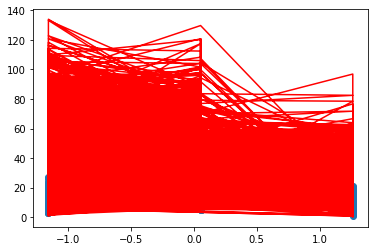

New Theta values are : [array([-0.001978]), array([0.00085187]), array([-0.00180938]), array([-0.00179736]), array([-0.00155673]), array([-0.52316579]), array([-0.23142799]), array([-0.11393112]), array([-0.14535645])]
New Theta values are : [array([0.01045612]), array([-0.002375]), array([0.0046288]), array([0.00464496]), array([0.00415265]), array([2.21726314]), array([0.96084101]), array([0.48193478]), array([0.63347487])]
New Theta values are : [array([-0.0369748]), array([0.010688]), array([-0.02167833]), array([-0.02165024]), array([-0.01907176]), array([-8.43048582]), array([-3.67993316]), array([-1.83364885]), array([-2.38535451])]
New Theta values are : [array([0.14822205]), array([-0.03955004]), array([0.07926019]), array([0.07926965]), array([0.07013712]), array([32.9466789]), array([14.34595864]), array([7.16432804]), array([9.35299152])]
New Theta values are : [array([-0.57054716]), array([0.15619221]), array([-0.31426228]), array([-0.31415304]), array([-0.27755715]), arra

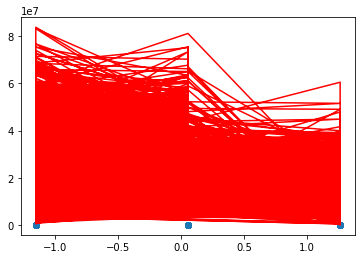

New Theta values are : [array([-1968.72726715]), array([535.7171257]), array([-1076.88049357]), array([-1076.62242187]), array([-951.52529832]), array([-440286.64574183]), array([-191827.69810816]), array([-95746.61397762]), array([-124890.0657953])]
New Theta values are : [array([7650.26203687]), array([-2081.72971995]), array([4184.61998326]), array([4183.61747504]), array([3697.50689656]), array([1710904.06918465]), array([745420.62588087]), array([372060.49975332]), array([485308.74422563])]
New Theta values are : [array([-29728.03646945]), array([8089.37180893]), array([-16260.97425838]), array([-16257.07827127]), array([-14368.1049604]), array([-6648378.59786052]), array([-2896619.86371151]), array([-1445784.78516426]), array([-1885854.48503267])]
New Theta values are : [array([115519.78492662]), array([-31434.3724218]), array([63188.2803563]), array([63173.14137184]), array([55832.80879381]), array([25834843.94181672]), array([11255935.60978544]), array([5618155.42139943]), arra

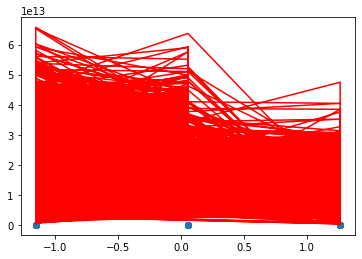

New Theta values are : [array([-1.54556415e+09]), array([4.20567289e+08]), array([-8.45409722e+08]), array([-8.45207173e+08]), array([-7.46999267e+08]), array([-3.45649964e+11]), array([-1.50595597e+11]), array([-7.51665165e+10]), array([-9.80457916e+10])]
New Theta values are : [array([6.00588666e+09]), array([-1.63427669e+09]), array([3.28516611e+09]), array([3.28437903e+09]), array([2.90275427e+09]), array([1.34315648e+12]), array([5.85197378e+11]), array([2.92088541e+11]), array([3.80994805e+11])]
New Theta values are : [array([-2.33381931e+10]), array([6.35061351e+09]), array([-1.27657822e+10]), array([-1.27627237e+10]), array([-1.12797732e+10]), array([-5.21935347e+12]), array([-2.27401051e+12]), array([-1.13502288e+12]), array([-1.48050252e+12])]
New Theta values are : [array([9.06895663e+10]), array([-2.46777625e+10]), array([4.9606379e+10]), array([4.95944939e+10]), array([4.3831917e+10]), array([2.02818145e+13]), array([8.83654644e+12]), array([4.41056994e+12]), array([5.7530

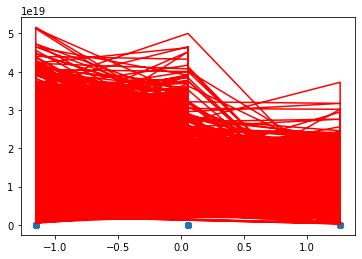

New Theta values are : [array([-1.21335532e+15]), array([3.30169122e+14]), array([-6.63694474e+14]), array([-6.63535462e+14]), array([-5.86436698e+14]), array([-2.71354783e+17]), array([-1.18226066e+17]), array([-5.90099691e+16]), array([-7.69714949e+16])]
New Theta values are : [array([4.7149609e+15]), array([-1.28299969e+15]), array([2.57904131e+15]), array([2.5784234e+15]), array([2.27882637e+15]), array([1.05445385e+18]), array([4.59413058e+17]), array([2.29306034e+17]), array([2.99102483e+17])]
New Theta values are : [array([-1.83218023e+16]), array([4.98559099e+15]), array([-1.00218614e+16]), array([-1.00194603e+16]), array([-8.85526031e+15]), array([-4.09748784e+18]), array([-1.78522694e+18]), array([-8.91057193e+17]), array([-1.16227826e+18])]
New Theta values are : [array([7.11964417e+16]), array([-1.93734401e+16]), array([3.89438148e+16]), array([3.89344843e+16]), array([3.44105353e+16]), array([1.59223721e+19]), array([6.93718902e+18]), array([3.462547e+18]), array([4.516481

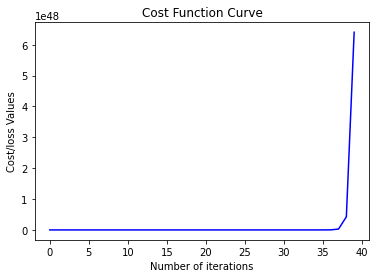

In [ ]:
theta_array=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X[:,4:5],X[:,5:6],X[:,6:7],X[:,7:8],Y,0.0001,40)

New Theta values are : [array([0.00099337]), array([-0.00011342]), array([0.00017947]), array([0.00018526]), array([0.00017972]), array([0.18173334]), array([0.0774195]), array([0.03943949]), array([0.05308133])]


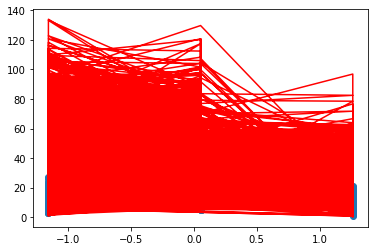

New Theta values are : [array([-0.001978]), array([0.00085187]), array([-0.00180938]), array([-0.00179736]), array([-0.00155673]), array([-0.52316579]), array([-0.23142799]), array([-0.11393112]), array([-0.14535645])]
New Theta values are : [array([0.01045612]), array([-0.002375]), array([0.0046288]), array([0.00464496]), array([0.00415265]), array([2.21726314]), array([0.96084101]), array([0.48193478]), array([0.63347487])]
New Theta values are : [array([-0.0369748]), array([0.010688]), array([-0.02167833]), array([-0.02165024]), array([-0.01907176]), array([-8.43048582]), array([-3.67993316]), array([-1.83364885]), array([-2.38535451])]
New Theta values are : [array([0.14822205]), array([-0.03955004]), array([0.07926019]), array([0.07926965]), array([0.07013712]), array([32.9466789]), array([14.34595864]), array([7.16432804]), array([9.35299152])]
New Theta values are : [array([-0.57054716]), array([0.15619221]), array([-0.31426228]), array([-0.31415304]), array([-0.27755715]), arra

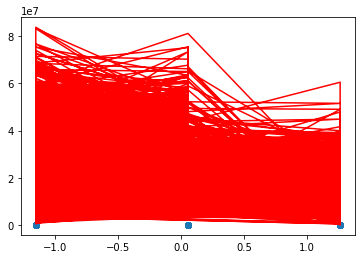

New Theta values are : [array([-1968.72726715]), array([535.7171257]), array([-1076.88049357]), array([-1076.62242187]), array([-951.52529832]), array([-440286.64574183]), array([-191827.69810816]), array([-95746.61397762]), array([-124890.0657953])]
New Theta values are : [array([7650.26203687]), array([-2081.72971995]), array([4184.61998326]), array([4183.61747504]), array([3697.50689656]), array([1710904.06918465]), array([745420.62588087]), array([372060.49975332]), array([485308.74422563])]
New Theta values are : [array([-29728.03646945]), array([8089.37180893]), array([-16260.97425838]), array([-16257.07827127]), array([-14368.1049604]), array([-6648378.59786052]), array([-2896619.86371151]), array([-1445784.78516426]), array([-1885854.48503267])]
New Theta values are : [array([115519.78492662]), array([-31434.3724218]), array([63188.2803563]), array([63173.14137184]), array([55832.80879381]), array([25834843.94181672]), array([11255935.60978544]), array([5618155.42139943]), arra

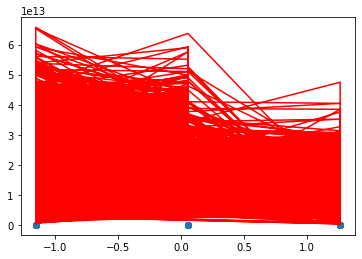

New Theta values are : [array([-1.54556415e+09]), array([4.20567289e+08]), array([-8.45409722e+08]), array([-8.45207173e+08]), array([-7.46999267e+08]), array([-3.45649964e+11]), array([-1.50595597e+11]), array([-7.51665165e+10]), array([-9.80457916e+10])]
New Theta values are : [array([6.00588666e+09]), array([-1.63427669e+09]), array([3.28516611e+09]), array([3.28437903e+09]), array([2.90275427e+09]), array([1.34315648e+12]), array([5.85197378e+11]), array([2.92088541e+11]), array([3.80994805e+11])]
New Theta values are : [array([-2.33381931e+10]), array([6.35061351e+09]), array([-1.27657822e+10]), array([-1.27627237e+10]), array([-1.12797732e+10]), array([-5.21935347e+12]), array([-2.27401051e+12]), array([-1.13502288e+12]), array([-1.48050252e+12])]
New Theta values are : [array([9.06895663e+10]), array([-2.46777625e+10]), array([4.9606379e+10]), array([4.95944939e+10]), array([4.3831917e+10]), array([2.02818145e+13]), array([8.83654644e+12]), array([4.41056994e+12]), array([5.7530

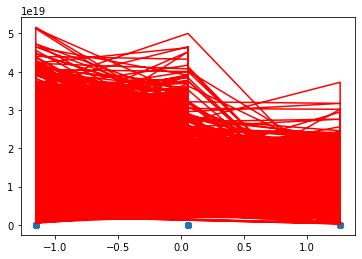

New Theta values are : [array([-1.21335532e+15]), array([3.30169122e+14]), array([-6.63694474e+14]), array([-6.63535462e+14]), array([-5.86436698e+14]), array([-2.71354783e+17]), array([-1.18226066e+17]), array([-5.90099691e+16]), array([-7.69714949e+16])]
New Theta values are : [array([4.7149609e+15]), array([-1.28299969e+15]), array([2.57904131e+15]), array([2.5784234e+15]), array([2.27882637e+15]), array([1.05445385e+18]), array([4.59413058e+17]), array([2.29306034e+17]), array([2.99102483e+17])]
New Theta values are : [array([-1.83218023e+16]), array([4.98559099e+15]), array([-1.00218614e+16]), array([-1.00194603e+16]), array([-8.85526031e+15]), array([-4.09748784e+18]), array([-1.78522694e+18]), array([-8.91057193e+17]), array([-1.16227826e+18])]
New Theta values are : [array([7.11964417e+16]), array([-1.93734401e+16]), array([3.89438148e+16]), array([3.89344843e+16]), array([3.44105353e+16]), array([1.59223721e+19]), array([6.93718902e+18]), array([3.462547e+18]), array([4.516481

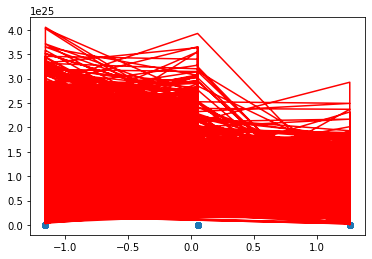

New Theta values are : [array([-9.52552593e+20]), array([2.59201445e+20]), array([-5.21037721e+20]), array([-5.20912887e+20]), array([-4.60385995e+20]), array([-2.13028861e+23]), array([-9.28141524e+22]), array([-4.63261652e+22]), array([-6.04269794e+22])]
New Theta values are : [array([3.70151113e+21]), array([-1.00722736e+21]), array([2.02469338e+21]), array([2.02420829e+21]), array([1.78900766e+21]), array([8.27805945e+23]), array([3.60665249e+23]), array([1.80018214e+23]), array([2.34812375e+23])]
New Theta values are : [array([-1.43836516e+22]), array([3.91397107e+21]), array([-7.86772838e+21]), array([-7.86584338e+21]), array([-6.95188047e+21]), array([-3.21675983e+24]), array([-1.40150417e+24]), array([-6.99530322e+23]), array([-9.12454207e+23])]
New Theta values are : [array([5.58932358e+22]), array([-1.52092468e+22]), array([3.05730984e+22]), array([3.05657735e+22]), array([2.70142175e+22]), array([1.24999632e+25]), array([5.44608596e+24]), array([2.71829534e+24]), array([3.54

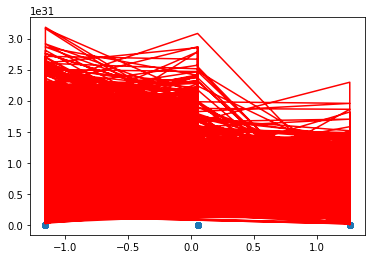

New Theta values are : [array([-7.47807691e+26]), array([2.03487803e+26]), array([-4.09044097e+26]), array([-4.08946095e+26]), array([-3.61429059e+26]), array([-1.67239711e+29]), array([-7.2864362e+28]), array([-3.63686613e+28]), array([-4.74385984e+28])]
New Theta values are : [array([2.90589571e+27]), array([-7.90730478e+26]), array([1.58949888e+27]), array([1.58911806e+27]), array([1.40447225e+27]), array([6.49874513e+29]), array([2.83142631e+29]), array([1.41324485e+29]), array([1.84341003e+29])]
New Theta values are : [array([-1.12919805e+28]), array([3.07268878e+27]), array([-6.17661202e+27]), array([-6.17513219e+27]), array([-5.45761958e+27]), array([-2.52533851e+30]), array([-1.10026009e+30]), array([-5.4917089e+29]), array([-7.16328189e+29])]
New Theta values are : [array([4.38793531e+28]), array([-1.19401194e+28]), array([2.40016124e+28]), array([2.3995862e+28]), array([2.12076895e+28]), array([9.81317848e+30]), array([4.27548568e+30]), array([2.13401567e+30]), array([2.78356

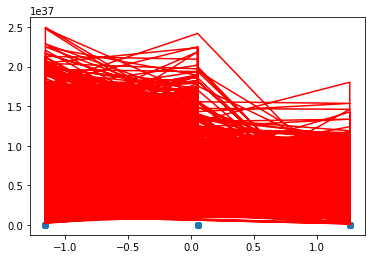

New Theta values are : [array([-5.87071356e+32]), array([1.59749441e+32]), array([-3.21122764e+32]), array([-3.21045827e+32]), array([-2.83742265e+32]), array([-1.31292637e+35]), array([-5.72026477e+34]), array([-2.85514573e+34]), array([-3.72419843e+34])]
New Theta values are : [array([2.28129258e+33]), array([-6.20768173e+32]), array([1.24784657e+33]), array([1.2475476e+33]), array([1.1025902e+33]), array([5.10188269e+35]), array([2.22282989e+35]), array([1.10947718e+35]), array([1.44718119e+35])]
New Theta values are : [array([-8.86484373e+33]), array([2.41223458e+33]), array([-4.84898997e+33]), array([-4.84782822e+33]), array([-4.28454022e+33]), array([-1.98253364e+36]), array([-8.63766435e+35]), array([-4.31130226e+35]), array([-5.62358166e+35])]
New Theta values are : [array([3.44477754e+34]), array([-9.37366947e+33]), array([1.8842624e+34]), array([1.88381096e+34]), array([1.66492364e+34]), array([7.70390044e+36]), array([3.35649821e+36]), array([1.67532307e+36]), array([2.18525

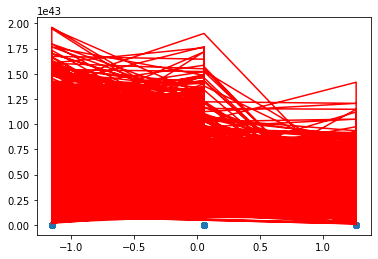

New Theta values are : [array([-4.60884238e+38]), array([1.25412351e+38]), array([-2.52099542e+38]), array([-2.52039143e+38]), array([-2.22753735e+38]), array([-1.0307215e+41]), array([-4.49073155e+40]), array([-2.24145097e+40]), array([-2.92370653e+40])]
New Theta values are : [array([1.79094377e+39]), array([-4.87338146e+38]), array([9.79630174e+38]), array([9.79395468e+38]), array([8.65595703e+38]), array([4.00526663e+41]), array([1.74504725e+41]), array([8.71002376e+40]), array([1.13611913e+41])]
New Theta values are : [array([-6.959404e+39]), array([1.89374066e+39]), array([-3.80673154e+39]), array([-3.8058195e+39]), array([-3.36360654e+39]), array([-1.5564011e+42]), array([-6.78105532e+41]), array([-3.38461626e+41]), array([-4.41482985e+41])]
New Theta values are : [array([2.70434531e+40]), array([-7.35886099e+39]), array([1.47925262e+40]), array([1.47889821e+40]), array([1.30705928e+40]), array([6.04799781e+42]), array([2.63504104e+42]), array([1.31522342e+42]), array([1.7155527

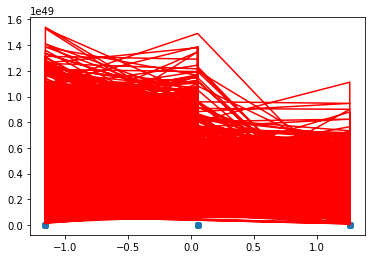

New Theta values are : [array([-3.61820208e+44]), array([9.84557929e+43]), array([-1.97912407e+44]), array([-1.9786499e+44]), array([-1.74874288e+44]), array([-8.09174709e+46]), array([-3.5254784e+46]), array([-1.75966586e+46]), array([-2.29527508e+46])]
New Theta values are : [array([1.40599221e+45]), array([-3.82588023e+44]), array([7.69065125e+44]), array([7.68880867e+44]), array([6.79541611e+44]), array([3.14436097e+47]), array([1.36996085e+47]), array([6.83786156e+46]), array([8.91917813e+46])]
New Theta values are : [array([-5.46352597e+45]), array([1.48669358e+45]), array([-2.98849968e+45]), array([-2.98778368e+45]), array([-2.64062148e+45]), array([-1.22186294e+48]), array([-5.32351217e+47]), array([-2.6571153e+47]), array([-3.46589127e+47])]
New Theta values are : [array([2.12306411e+46]), array([-5.77712232e+45]), array([1.16129702e+46]), array([1.16101879e+46]), array([1.0261155e+46]), array([4.74802054e+48]), array([2.06865634e+48]), array([1.03252481e+48]), array([1.346805

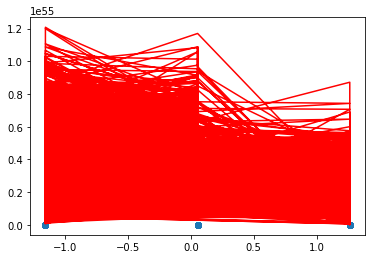

New Theta values are : [array([-2.84049339e+50]), array([7.72933691e+49]), array([-1.5537244e+50]), array([-1.55335215e+50]), array([-1.37286212e+50]), array([-6.35247938e+52]), array([-2.76770006e+52]), array([-1.38143728e+52]), array([-1.80192083e+52])]
New Theta values are : [array([1.10378345e+51]), array([-3.00353249e+50]), array([6.03759645e+50]), array([6.03614992e+50]), array([5.33478621e+50]), array([2.4685013e+53]), array([1.07549679e+53]), array([5.36810828e+52]), array([7.00205957e+52])]
New Theta values are : [array([-4.28917707e+51]), array([1.1671386e+51]), array([-2.34614137e+51]), array([-2.34557927e+51]), array([-2.0730373e+51]), array([-9.59231555e+53]), array([-4.17925832e+53]), array([-2.08598588e+53]), array([-2.72092078e+53])]
New Theta values are : [array([1.66672547e+52]), array([-4.53536796e+51]), array([9.11683877e+51]), array([9.1146545e+51]), array([8.05558737e+51]), array([3.72746482e+54]), array([1.62401229e+54]), array([8.10590408e+53]), array([1.0573189

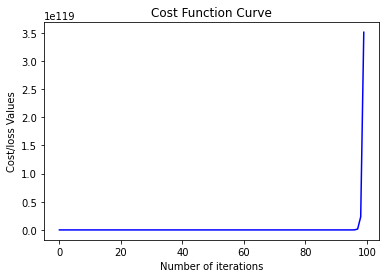

In [ ]:
theta_array=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X[:,4:5],X[:,5:6],X[:,6:7],X[:,7:8],Y,0.0001,100)

New Theta values are : [array([0.00099337]), array([-0.00011342]), array([0.00017947]), array([0.00018526]), array([0.00017972]), array([0.18173334]), array([0.0774195]), array([0.03943949]), array([0.05308133])]


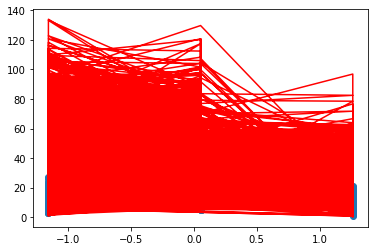

New Theta values are : [array([-0.001978]), array([0.00085187]), array([-0.00180938]), array([-0.00179736]), array([-0.00155673]), array([-0.52316579]), array([-0.23142799]), array([-0.11393112]), array([-0.14535645])]
New Theta values are : [array([0.01045612]), array([-0.002375]), array([0.0046288]), array([0.00464496]), array([0.00415265]), array([2.21726314]), array([0.96084101]), array([0.48193478]), array([0.63347487])]


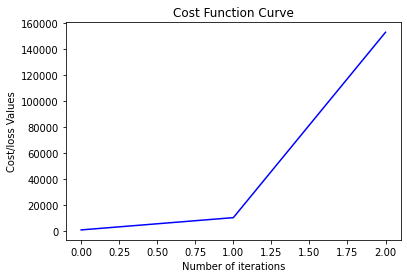

In [ ]:
theta_array=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X[:,4:5],X[:,5:6],X[:,6:7],X[:,7:8],Y,0.0001,3)

New Theta values are : [array([0.00993368]), array([-0.0011342]), array([0.00179474]), array([0.00185258]), array([0.00179715]), array([1.81733342]), array([0.77419497]), array([0.3943949]), array([0.53081326])]


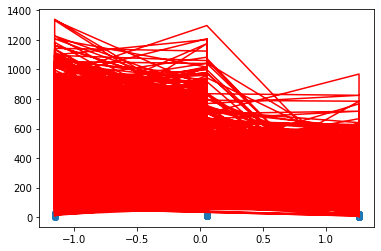

New Theta values are : [array([-0.37660679]), array([0.10560287]), array([-0.21324288]), array([-0.21308218]), array([-0.18802187]), array([-85.02858016]), array([-37.07830899]), array([-18.49222035]), array([-24.09028403])]
New Theta values are : [array([18.21062109]), array([-4.95067218]), array([9.95023207]), array([9.94800319]), array([8.7925337]), array([4071.42277929]), array([1773.82597058]), array([885.38677047]), array([1154.92491342])]
New Theta values are : [array([-871.26605411]), array([237.08855834]), array([-476.58907156]), array([-476.47469172]), array([-421.11070483]), array([-194851.53258599]), array([-84894.56086145]), array([-42373.24866971]), array([-55270.81542356])]
New Theta values are : [array([41698.16299087]), array([-11346.58268343]), array([22808.5031161]), array([22803.03873606]), array([20153.46569084]), array([9325375.13119917]), array([4062955.47306778]), array([2027935.87189424]), array([2645201.50791996])]
New Theta values are : [array([-1995626.25200

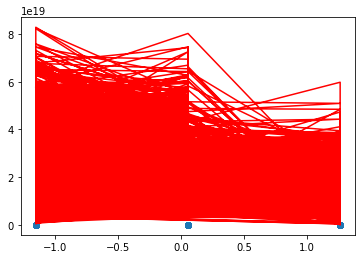

New Theta values are : [array([-2.3980239e+16]), array([6.52532221e+15]), array([-1.31169755e+16]), array([-1.31138329e+16]), array([-1.15900857e+16]), array([-5.36294061e+18]), array([-2.33656973e+18]), array([-1.16624795e+18]), array([-1.52123191e+18])]
New Theta values are : [array([1.14766699e+18]), array([-3.12294506e+17]), array([6.27763544e+17]), array([6.2761314e+17]), array([5.5468833e+17]), array([2.56664243e+20]), array([1.11825572e+20]), array([5.58153018e+19]), array([7.28044308e+19])]
New Theta values are : [array([-5.49260378e+19]), array([1.49460602e+19]), array([-3.00440498e+19]), array([-3.00368517e+19]), array([-2.65467532e+19]), array([-1.2283659e+22]), array([-5.35184481e+21]), array([-2.67125692e+21]), array([-3.48433733e+21])]
New Theta values are : [array([2.62869776e+21]), array([-7.15301456e+20]), array([1.43787408e+21]), array([1.43752959e+21]), array([1.27049744e+21]), array([5.87881963e+23]), array([2.56133211e+23]), array([1.27843321e+23]), array([1.667564

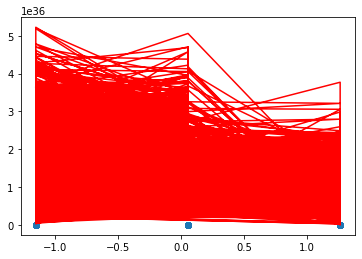

New Theta values are : [array([-1.51174079e+33]), array([4.11363531e+32]), array([-8.2690865e+32]), array([-8.26710533e+32]), array([-7.30651824e+32]), array([-3.38085709e+35]), array([-1.47299941e+35]), array([-7.35215612e+34]), array([-9.59001429e+34])]
New Theta values are : [array([7.23501966e+34]), array([-1.96873912e+34]), array([3.95749083e+34]), array([3.95654267e+34]), array([3.4968166e+34]), array([1.61803979e+37]), array([7.04960778e+36]), array([3.51865837e+36]), array([4.58967186e+36])]
New Theta values are : [array([-3.46259819e+36]), array([9.42216169e+35]), array([-1.89401014e+36]), array([-1.89355636e+36]), array([-1.67353669e+36]), array([-7.74375455e+38]), array([-3.37386218e+38]), array([-1.68398991e+38]), array([-2.1965648e+38])]
New Theta values are : [array([1.65716015e+38]), array([-4.50933952e+37]), array([9.06451731e+37]), array([9.06234557e+37]), array([8.00935642e+37]), array([3.70607293e+40]), array([1.6146921e+40]), array([8.05938437e+39]), array([1.051250

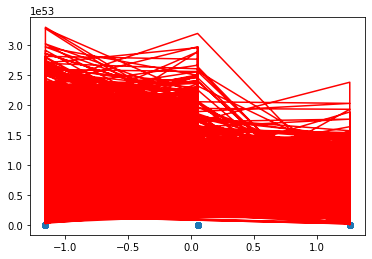

New Theta values are : [array([-9.53018122e+49]), array([2.59328121e+49]), array([-5.21292361e+49]), array([-5.21167467e+49]), array([-4.60610993e+49]), array([-2.13132972e+52]), array([-9.28595123e+51]), array([-4.63488056e+51]), array([-6.04565111e+51])]
New Theta values are : [array([4.56103644e+51]), array([-1.24111492e+51]), array([2.494846e+51]), array([2.49424827e+51]), array([2.20443187e+51]), array([1.02003018e+54]), array([4.44415074e+53]), array([2.21820117e+53]), array([2.89337992e+53])]
New Theta values are : [array([-2.18286021e+53]), array([5.93983497e+52]), array([-1.19400495e+53]), array([-1.19371888e+53]), array([-1.05501604e+53]), array([-4.88174854e+55]), array([-2.12692004e+55]), array([-1.06160587e+55]), array([-1.38473875e+55])]
New Theta values are : [array([1.04469209e+55]), array([-2.84273752e+54]), array([5.714372e+54]), array([5.71300291e+54]), array([5.0491869e+54]), array([2.33634938e+57]), array([1.01791976e+57]), array([5.08072507e+56]), array([6.6272023

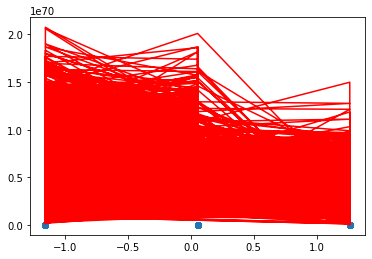

New Theta values are : [array([-6.00793168e+66]), array([1.63483317e+66]), array([-3.28628472e+66]), array([-3.28549737e+66]), array([-2.90374266e+66]), array([-1.34361383e+69]), array([-5.85396639e+68]), array([-2.92187998e+68]), array([-3.81124535e+68])]
New Theta values are : [array([2.87532783e+68]), array([-7.82412577e+67]), array([1.57277852e+68]), array([1.57240171e+68]), array([1.38969824e+68]), array([6.43038312e+70]), array([2.80164179e+70]), array([1.39837856e+70]), array([1.82401871e+70])]
New Theta values are : [array([-1.37609923e+70]), array([3.74453768e+69]), array([-7.52713929e+69]), array([-7.52533588e+69]), array([-6.65093786e+69]), array([-3.07750829e+72]), array([-1.34083393e+72]), array([-6.69248087e+71]), array([-8.72954629e+71])]
New Theta values are : [array([6.58585452e+71]), array([-1.79209318e+71]), array([3.60240333e+71]), array([3.60154024e+71]), array([3.18306328e+71]), array([1.4728605e+74]), array([6.4170788e+73]), array([3.20294529e+73]), array([4.1778

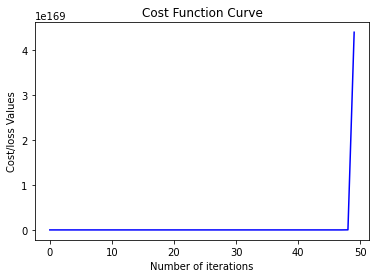

In [ ]:
theta_array=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X[:,4:5],X[:,5:6],X[:,6:7],X[:,7:8],Y,0.001,50)

New Theta values are : [array([0.00993368]), array([-0.0011342]), array([0.00179474]), array([0.00185258]), array([0.00179715]), array([1.81733342]), array([0.77419497]), array([0.3943949]), array([0.53081326])]


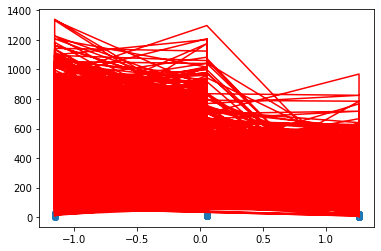

New Theta values are : [array([-0.37660679]), array([0.10560287]), array([-0.21324288]), array([-0.21308218]), array([-0.18802187]), array([-85.02858016]), array([-37.07830899]), array([-18.49222035]), array([-24.09028403])]
New Theta values are : [array([18.21062109]), array([-4.95067218]), array([9.95023207]), array([9.94800319]), array([8.7925337]), array([4071.42277929]), array([1773.82597058]), array([885.38677047]), array([1154.92491342])]
New Theta values are : [array([-871.26605411]), array([237.08855834]), array([-476.58907156]), array([-476.47469172]), array([-421.11070483]), array([-194851.53258599]), array([-84894.56086145]), array([-42373.24866971]), array([-55270.81542356])]
New Theta values are : [array([41698.16299087]), array([-11346.58268343]), array([22808.5031161]), array([22803.03873606]), array([20153.46569084]), array([9325375.13119917]), array([4062955.47306778]), array([2027935.87189424]), array([2645201.50791996])]
New Theta values are : [array([-1995626.25200

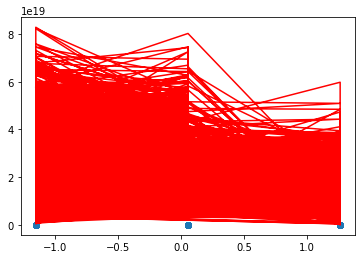

New Theta values are : [array([-2.3980239e+16]), array([6.52532221e+15]), array([-1.31169755e+16]), array([-1.31138329e+16]), array([-1.15900857e+16]), array([-5.36294061e+18]), array([-2.33656973e+18]), array([-1.16624795e+18]), array([-1.52123191e+18])]
New Theta values are : [array([1.14766699e+18]), array([-3.12294506e+17]), array([6.27763544e+17]), array([6.2761314e+17]), array([5.5468833e+17]), array([2.56664243e+20]), array([1.11825572e+20]), array([5.58153018e+19]), array([7.28044308e+19])]
New Theta values are : [array([-5.49260378e+19]), array([1.49460602e+19]), array([-3.00440498e+19]), array([-3.00368517e+19]), array([-2.65467532e+19]), array([-1.2283659e+22]), array([-5.35184481e+21]), array([-2.67125692e+21]), array([-3.48433733e+21])]
New Theta values are : [array([2.62869776e+21]), array([-7.15301456e+20]), array([1.43787408e+21]), array([1.43752959e+21]), array([1.27049744e+21]), array([5.87881963e+23]), array([2.56133211e+23]), array([1.27843321e+23]), array([1.667564

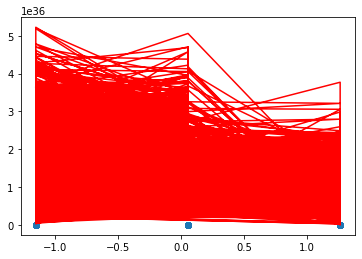

New Theta values are : [array([-1.51174079e+33]), array([4.11363531e+32]), array([-8.2690865e+32]), array([-8.26710533e+32]), array([-7.30651824e+32]), array([-3.38085709e+35]), array([-1.47299941e+35]), array([-7.35215612e+34]), array([-9.59001429e+34])]
New Theta values are : [array([7.23501966e+34]), array([-1.96873912e+34]), array([3.95749083e+34]), array([3.95654267e+34]), array([3.4968166e+34]), array([1.61803979e+37]), array([7.04960778e+36]), array([3.51865837e+36]), array([4.58967186e+36])]
New Theta values are : [array([-3.46259819e+36]), array([9.42216169e+35]), array([-1.89401014e+36]), array([-1.89355636e+36]), array([-1.67353669e+36]), array([-7.74375455e+38]), array([-3.37386218e+38]), array([-1.68398991e+38]), array([-2.1965648e+38])]
New Theta values are : [array([1.65716015e+38]), array([-4.50933952e+37]), array([9.06451731e+37]), array([9.06234557e+37]), array([8.00935642e+37]), array([3.70607293e+40]), array([1.6146921e+40]), array([8.05938437e+39]), array([1.051250

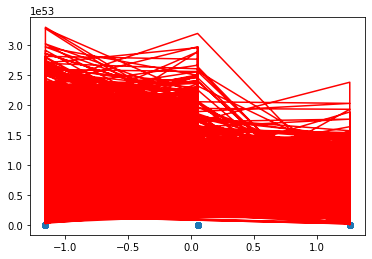

New Theta values are : [array([-9.53018122e+49]), array([2.59328121e+49]), array([-5.21292361e+49]), array([-5.21167467e+49]), array([-4.60610993e+49]), array([-2.13132972e+52]), array([-9.28595123e+51]), array([-4.63488056e+51]), array([-6.04565111e+51])]
New Theta values are : [array([4.56103644e+51]), array([-1.24111492e+51]), array([2.494846e+51]), array([2.49424827e+51]), array([2.20443187e+51]), array([1.02003018e+54]), array([4.44415074e+53]), array([2.21820117e+53]), array([2.89337992e+53])]
New Theta values are : [array([-2.18286021e+53]), array([5.93983497e+52]), array([-1.19400495e+53]), array([-1.19371888e+53]), array([-1.05501604e+53]), array([-4.88174854e+55]), array([-2.12692004e+55]), array([-1.06160587e+55]), array([-1.38473875e+55])]
New Theta values are : [array([1.04469209e+55]), array([-2.84273752e+54]), array([5.714372e+54]), array([5.71300291e+54]), array([5.0491869e+54]), array([2.33634938e+57]), array([1.01791976e+57]), array([5.08072507e+56]), array([6.6272023

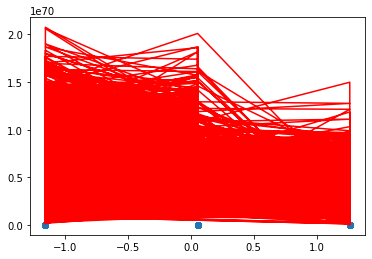

New Theta values are : [array([-6.00793168e+66]), array([1.63483317e+66]), array([-3.28628472e+66]), array([-3.28549737e+66]), array([-2.90374266e+66]), array([-1.34361383e+69]), array([-5.85396639e+68]), array([-2.92187998e+68]), array([-3.81124535e+68])]
New Theta values are : [array([2.87532783e+68]), array([-7.82412577e+67]), array([1.57277852e+68]), array([1.57240171e+68]), array([1.38969824e+68]), array([6.43038312e+70]), array([2.80164179e+70]), array([1.39837856e+70]), array([1.82401871e+70])]
New Theta values are : [array([-1.37609923e+70]), array([3.74453768e+69]), array([-7.52713929e+69]), array([-7.52533588e+69]), array([-6.65093786e+69]), array([-3.07750829e+72]), array([-1.34083393e+72]), array([-6.69248087e+71]), array([-8.72954629e+71])]
New Theta values are : [array([6.58585452e+71]), array([-1.79209318e+71]), array([3.60240333e+71]), array([3.60154024e+71]), array([3.18306328e+71]), array([1.4728605e+74]), array([6.4170788e+73]), array([3.20294529e+73]), array([4.1778

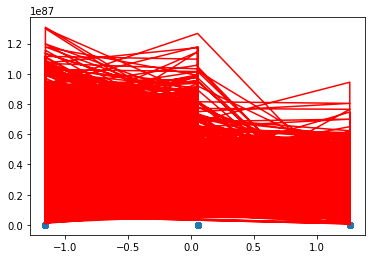

New Theta values are : [array([-3.7874666e+83]), array([1.03061692e+83]), array([-2.07171024e+83]), array([-2.07121389e+83]), array([-1.8305515e+83]), array([-8.47029025e+85]), array([-3.69040518e+85]), array([-1.84198547e+85]), array([-2.40265123e+85])]
New Theta values are : [array([1.81263848e+85]), array([-4.93241545e+84]), array([9.91496981e+84]), array([9.91259432e+84]), array([8.76081146e+84]), array([4.05378466e+87]), array([1.76618598e+87]), array([8.81553314e+86]), array([1.14988158e+87])]
New Theta values are : [array([-8.67508177e+86]), array([2.36059798e+86]), array([-4.74519188e+86]), array([-4.744055e+86]), array([-4.19282481e+86]), array([-1.94009527e+89]), array([-8.45276541e+88]), array([-4.21901398e+88]), array([-5.50320256e+88])]
New Theta values are : [array([4.15179555e+88]), array([-1.12975537e+88]), array([2.27099491e+88]), array([2.27045081e+88]), array([2.00663831e+88]), array([9.28507552e+90]), array([4.04539747e+90]), array([2.01917215e+90]), array([2.633770

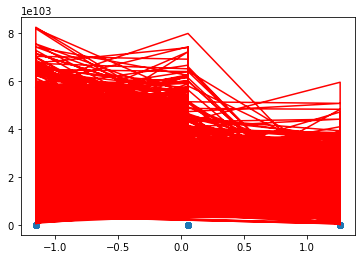

New Theta values are : [array([-2.38766085e+100]), array([6.49712306e+99]), array([-1.30602906e+100]), array([-1.30571615e+100]), array([-1.15399992e+100]), array([-5.33976469e+102]), array([-2.32647225e+102]), array([-1.16120802e+102]), array([-1.51465792e+102])]
New Theta values are : [array([1.14270735e+102]), array([-3.10944927e+101]), array([6.25050666e+101]), array([6.24900913e+101]), array([5.52291247e+101]), array([2.5555507e+104]), array([1.11342318e+104]), array([5.55740962e+103]), array([7.24898068e+103])]
New Theta values are : [array([-5.46886752e+103]), array([1.48814708e+103]), array([-2.99142146e+103]), array([-2.99070476e+103]), array([-2.64320315e+103]), array([-1.22305753e+106]), array([-5.32871683e+105]), array([-2.65971309e+105]), array([-3.46927978e+105])]
New Theta values are : [array([2.61733785e+105]), array([-7.12210284e+104]), array([1.43166032e+105]), array([1.43131731e+105]), array([1.26500699e+105]), array([5.85341433e+107]), array([2.55026332e+107]), arra

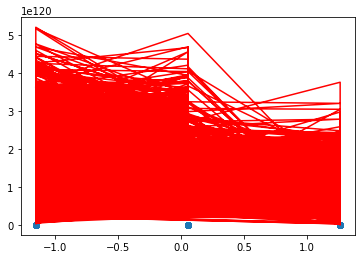

New Theta values are : [array([-1.50520781e+117]), array([4.09585826e+116]), array([-8.23335168e+116]), array([-8.23137908e+116]), array([-7.27494315e+116]), array([-3.36624673e+119]), array([-1.46663385e+119]), array([-7.32038381e+118]), array([-9.54857109e+118])]
New Theta values are : [array([7.20375355e+118]), array([-1.96023122e+118]), array([3.94038855e+118]), array([3.93944449e+118]), array([3.48170512e+118]), array([1.61104743e+121]), array([7.01914293e+120]), array([3.50345251e+120]), array([4.56983762e+120])]
New Theta values are : [array([-3.44763459e+120]), array([9.38144386e+119]), array([-1.88582518e+120]), array([-1.88537337e+120]), array([-1.66630451e+120]), array([-7.71028995e+122]), array([-3.35928205e+122]), array([-1.67671256e+122]), array([-2.18707236e+122])]
New Theta values are : [array([1.64999874e+122]), array([-4.48985243e+121]), array([9.02534504e+121]), array([9.02318269e+121]), array([7.97474403e+121]), array([3.69005716e+124]), array([1.60771421e+124]), ar

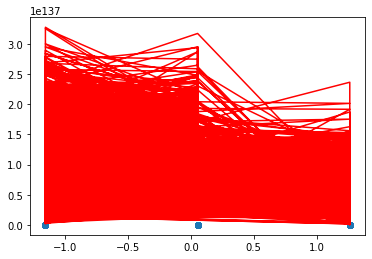

New Theta values are : [array([-9.48899659e+133]), array([2.58207436e+133]), array([-5.19039599e+133]), array([-5.18915244e+133]), array([-4.58620465e+133]), array([-2.12211918e+136]), array([-9.24582204e+135]), array([-4.61485095e+135]), array([-6.01952486e+135])]
New Theta values are : [array([4.54132594e+135]), array([-1.23575145e+135]), array([2.48406454e+135]), array([2.48346939e+135]), array([2.19490543e+135]), array([1.01562213e+138]), array([4.42494536e+137]), array([2.20861522e+137]), array([2.88087619e+137])]
New Theta values are : [array([-2.17342699e+137]), array([5.914166e+136]), array([-1.18884506e+137]), array([-1.18856023e+137]), array([-1.0504568e+137]), array([-4.86065209e+139]), array([-2.11772857e+139]), array([-1.05701815e+139]), array([-1.37875461e+139])]
New Theta values are : [array([1.04017746e+139]), array([-2.83045264e+138]), array([5.68967737e+138]), array([5.68831419e+138]), array([5.02736686e+138]), array([2.32625286e+141]), array([1.01352083e+141]), array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in add
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


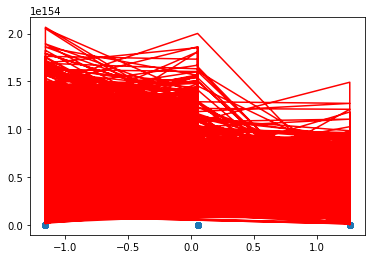

New Theta values are : [array([-5.98196843e+150]), array([1.62776824e+150]), array([-3.27208305e+150]), array([-3.27129911e+150]), array([-2.89119415e+150]), array([-1.33780741e+153]), array([-5.8286685e+152]), array([-2.90925309e+152]), array([-3.79477507e+152])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([2.86290211e+152]), array([-7.79031384e+151]), array([1.56598177e+152]), array([1.56560658e+152]), array([1.38369267e+152]), array([6.40259425e+154]), array([2.78953451e+154]), array([1.39233547e+154]), array([1.81613622e+154])]
New Theta values are : [array([-1.37015242e+154]), array([3.72835568e+153]), array([-7.49461079e+153]), array([-7.49281518e+153]), array([-6.62219587e+153]), array([-3.06420885e+156]), array([-1.33503952e+156]), array([-6.66355935e+155]), array([-8.6918216e+155])]
New Theta values are : [array([6.55739378e+155]), array([-1.78434866e+155]), array([3.58683556e+155]), array([3.5859762e+155]), array([3.16930769e+155]), array([1.46649554e+158]), array([6.38934743e+157]), array([3.18910378e+157]), array([4.15980705e+157])]
New Theta values are : [array([-3.13829415e+157]), array([8.53968993e+156]), array([-1.71661874e+157]), array([-1.71620746e+157]), array([-1.51679465e+157]), array([-7.01848099e+159]), array([-3.05786907e+159]), array(

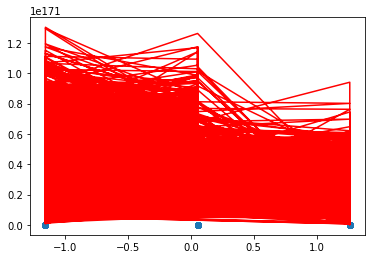

New Theta values are : [array([-3.77109908e+167]), array([1.02616311e+167]), array([-2.06275736e+167]), array([-2.06226315e+167]), array([-1.82264078e+167]), array([-8.43368593e+169]), array([-3.67445711e+169]), array([-1.83402534e+169]), array([-2.39226819e+169])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([1.80480517e+169]), array([-4.91110004e+168]), array([9.87212231e+168]), array([9.86975709e+168]), array([8.72295165e+168]), array([4.03626625e+171]), array([1.75855342e+171]), array([8.77743685e+170]), array([1.14491237e+171])]
New Theta values are : [array([-8.63759244e+170]), array([2.35039667e+170]), array([-4.72468556e+170]), array([-4.72355359e+170]), array([-4.17470554e+170]), array([-1.93171116e+173]), array([-8.41623683e+172]), array([-4.20078153e+172]), array([-5.4794205e+172])]
New Theta values are : [array([4.13385359e+172]), array([-1.12487314e+172]), array([2.26118082e+172]), array([2.26063907e+172]), array([1.99796663e+172]), array([9.24495011e+174]), array([4.02791531e+174]), array([2.01044631e+174]), array([2.62238838e+174])]
New Theta values are : [array([-1.97841535e+174]), array([5.38351501e+173]), array([-1.08217545e+174]), array([-1.08191617e+174]), array([-9.56204126e+173]), array([-4.42452807e+176]), array([-1.92771449e+176]), array

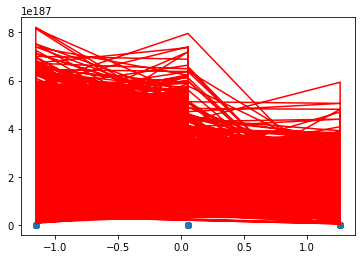

New Theta values are : [array([-2.37734258e+184]), array([6.46904577e+183]), array([-1.30038506e+184]), array([-1.30007351e+184]), array([-1.14901291e+184]), array([-5.31668892e+186]), array([-2.31641841e+186]), array([-1.15618986e+186]), array([-1.50811233e+186])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([1.13776914e+186]), array([-3.0960118e+185]), array([6.22349513e+185]), array([6.22200406e+185]), array([5.49904523e+185]), array([2.5445069e+188]), array([1.10861153e+188]), array([5.5333933e+187]), array([7.21765424e+187])]
New Theta values are : [array([-5.44523384e+187]), array([1.48171606e+187]), array([-2.97849405e+187]), array([-2.97778044e+187]), array([-2.63178056e+187]), array([-1.21777209e+190]), array([-5.30568881e+189]), array([-2.64821915e+189]), array([-3.4542873e+189])]
New Theta values are : [array([2.60602704e+189]), array([-7.09132471e+188]), array([1.42547341e+189]), array([1.42513188e+189]), array([1.25954027e+189]), array([5.82811883e+191]), array([2.53924237e+191]), array([1.26740759e+191]), array([1.65318265e+191])]
New Theta values are : [array([-1.24721493e+191]), array([3.39382742e+190]), array([-6.82215373e+190]), array([-6.82051924e+190]), array([-6.0280166e+190]), array([-2.78927144e+193]), array([-1.21525254e+193]), array([-6

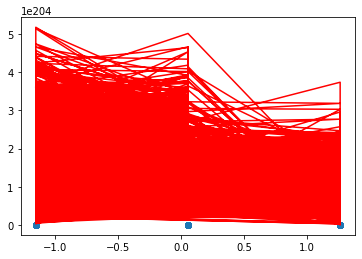

New Theta values are : [array([-1.49870307e+201]), array([4.07815803e+200]), array([-8.19777129e+200]), array([-8.19580721e+200]), array([-7.24350452e+200]), array([-3.35169951e+203]), array([-1.4602958e+203]), array([-7.28874881e+202]), array([-9.50730698e+202])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([7.17262257e+202]), array([-1.95176009e+202]), array([3.92336018e+202]), array([3.9224202e+202]), array([3.46665895e+202]), array([1.6040853e+205]), array([6.98880974e+204]), array([3.48831235e+204]), array([4.55008909e+204])]
New Theta values are : [array([-3.43273565e+204]), array([9.340902e+203]), array([-1.8776756e+204]), array([-1.87722573e+204]), array([-1.65910358e+204]), array([-7.67696997e+206]), array([-3.34476492e+206]), array([-1.66946665e+206]), array([-2.17762093e+206])]
New Theta values are : [array([1.64286828e+206]), array([-4.47044955e+205]), array([8.98634205e+205]), array([8.98418905e+205]), array([7.94028121e+205]), array([3.67411059e+208]), array([1.60076648e+208]), array([7.98987769e+207]), array([1.04218463e+208])]
New Theta values are : [array([-7.86258088e+207]), array([2.13950636e+207]), array([-4.30076119e+207]), array([-4.29973079e+207]), array([-3.80012836e+207]), array([-1.75838758e+210]), array([-7.66108649e+209]), array([-3

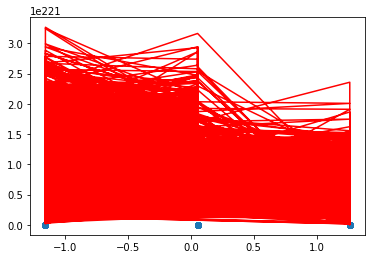

New Theta values are : [array([-9.44798993e+217]), array([2.57091594e+217]), array([-5.16796571e+217]), array([-5.16672754e+217]), array([-4.56638539e+217]), array([-2.11294846e+220]), array([-9.20586626e+219]), array([-4.59490789e+219]), array([-5.99351151e+219])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([4.52170062e+219]), array([-1.23041115e+219]), array([2.47332966e+219]), array([2.47273709e+219]), array([2.18542016e+219]), array([1.01123312e+222]), array([4.40582298e+221]), array([2.1990707e+221]), array([2.8684265e+221])]
New Theta values are : [array([-2.16403453e+221]), array([5.88860796e+220]), array([-1.18370747e+221]), array([-1.18342387e+221]), array([-1.04591725e+221]), array([-4.8396468e+223]), array([-2.10857681e+223]), array([-1.05245025e+223]), array([-1.37279633e+223])]
New Theta values are : [array([1.03568234e+223]), array([-2.81822086e+222]), array([5.66508945e+222]), array([5.66373217e+222]), array([5.00564112e+222]), array([2.31619996e+225]), array([1.0091409e+225]), array([5.03690729e+224]), array([6.57004723e+224])]
New Theta values are : [array([-4.95665798e+224]), array([1.34876848e+224]), array([-2.71124744e+224]), array([-2.71059786e+224]), array([-2.39564296e+224]), array([-1.10850698e+227]), array([-4.82963368e+226]), array([-

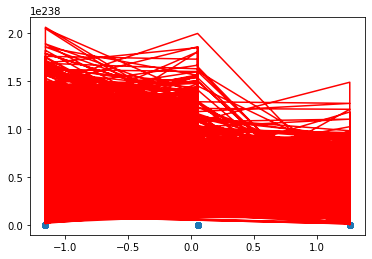

New Theta values are : [array([-5.95611738e+234]), array([1.62073385e+234]), array([-3.25794276e+234]), array([-3.2571622e+234]), array([-2.87869987e+234]), array([-1.33202608e+237]), array([-5.80347994e+236]), array([-2.89668077e+236]), array([-3.77837596e+236])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([2.8505301e+236]), array([-7.75664804e+235]), array([1.55921438e+236]), array([1.55884082e+236]), array([1.37771305e+236]), array([6.37492547e+238]), array([2.77747955e+238]), array([1.3863185e+238]), array([1.8082878e+238])]
New Theta values are : [array([-1.36423131e+238]), array([3.71224361e+237]), array([-7.46222286e+237]), array([-7.46043501e+237]), array([-6.59357808e+237]), array([-3.05096689e+240]), array([-1.32927015e+240]), array([-6.6347628e+239]), array([-8.65425993e+239])]
New Theta values are : [array([6.52905604e+239]), array([-1.77663761e+239]), array([3.57133507e+239]), array([3.57047942e+239]), array([3.15561154e+239]), array([1.46015808e+242]), array([6.36173589e+241]), array([3.17532208e+241]), array([4.14183046e+241])]
New Theta values are : [array([-3.12473203e+241]), array([8.5027857e+240]), array([-1.70920038e+241]), array([-1.70879088e+241]), array([-1.51023983e+241]), array([-6.98815066e+243]), array([-3.04465451e+243]), array([-1

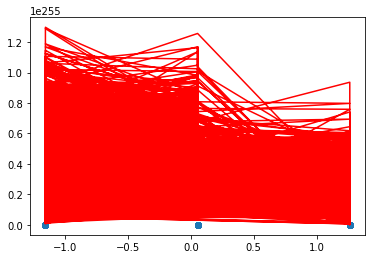

New Theta values are : [array([-3.75480229e+251]), array([1.02172855e+251]), array([-2.05384316e+251]), array([-2.05335109e+251]), array([-1.81476425e+251]), array([-8.3972398e+253]), array([-3.65857796e+253]), array([-1.8260996e+253]), array([-2.38193001e+253])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([1.79700571e+253]), array([-4.88987674e+252]), array([9.82945998e+252]), array([9.82710498e+252]), array([8.68525546e+252]), array([4.01882354e+255]), array([1.75095384e+255]), array([8.7395052e+254]), array([1.13996464e+255])]
New Theta values are : [array([-8.60026512e+254]), array([2.34023944e+254]), array([-4.70426785e+254]), array([-4.70314077e+254]), array([-4.15666457e+254]), array([-1.92336328e+257]), array([-8.3798661e+256]), array([-4.18262788e+256]), array([-5.45574121e+256])]
New Theta values are : [array([4.11598916e+256]), array([-1.120012e+256]), array([2.25140914e+256]), array([2.25086973e+256]), array([1.98933243e+256]), array([9.2049981e+258]), array([4.01050869e+258]), array([2.00175817e+258]), array([2.61105575e+258])]
New Theta values are : [array([-1.96986564e+258]), array([5.36025018e+257]), array([-1.07749883e+258]), array([-1.07724067e+258]), array([-9.52071894e+257]), array([-4.40540749e+260]), array([-1.91938389e+260]), array([-9

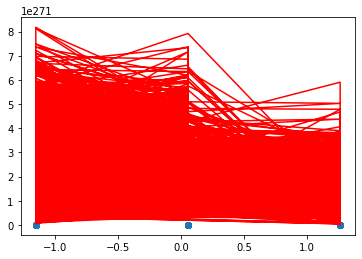

New Theta values are : [array([-2.36706891e+268]), array([6.44108982e+267]), array([-1.29476545e+268]), array([-1.29445524e+268]), array([-1.14404746e+268]), array([-5.29371287e+270]), array([-2.30640802e+270]), array([-1.15119339e+270]), array([-1.50159503e+270])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([1.13285228e+270]), array([-3.0826324e+269]), array([6.19660032e+269]), array([6.1951157e+269]), array([5.47528113e+269]), array([2.53351082e+272]), array([1.10382067e+272]), array([5.50948077e+271]), array([7.18646318e+271])]
New Theta values are : [array([-5.42170228e+271]), array([1.47531284e+271]), array([-2.9656225e+271]), array([-2.96491198e+271]), array([-2.62040733e+271]), array([-1.21250949e+274]), array([-5.2827603e+273]), array([-2.63677489e+273]), array([-3.43935962e+273])]
New Theta values are : [array([2.5947651e+273]), array([-7.06067958e+272]), array([1.41931323e+273]), array([1.41897318e+273]), array([1.25409717e+273]), array([5.80293264e+275]), array([2.52826905e+275]), array([1.2619305e+275]), array([1.64603843e+275])]
New Theta values are : [array([-1.24182509e+275]), array([3.37916101e+274]), array([-6.79267183e+274]), array([-6.79104439e+274]), array([-6.00196655e+274]), array([-2.77721762e+277]), array([-1.21000084e+277]), array([-6.

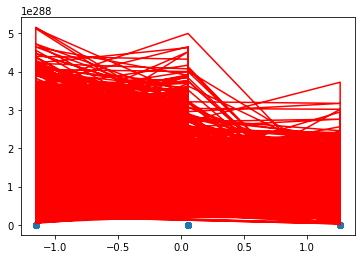

New Theta values are : [array([-1.49222643e+285]), array([4.06053428e+284]), array([-8.16234465e+284]), array([-8.16038907e+284]), array([-7.21220175e+284]), array([-3.33721516e+287]), array([-1.45398513e+287]), array([-7.25725052e+286]), array([-9.4662212e+286])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([7.14162611e+286]), array([-1.94332557e+286]), array([3.9064054e+286]), array([3.90546948e+286]), array([3.4516778e+286]), array([1.59715325e+289]), array([6.95860763e+288]), array([3.47323763e+288]), array([4.5304259e+288])]
New Theta values are : [array([-3.4179011e+288]), array([9.30053533e+287]), array([-1.86956123e+288]), array([-1.86911331e+288]), array([-1.65193377e+288]), array([-7.64379398e+290]), array([-3.33031054e+290]), array([-1.66225206e+290]), array([-2.16821035e+290])]
New Theta values are : [array([1.63576863e+290]), array([-4.45113052e+289]), array([8.94750762e+289]), array([8.94536391e+289]), array([7.90596732e+289]), array([3.65823294e+292]), array([1.59384878e+292]), array([7.95534947e+291]), array([1.03768084e+292])]
New Theta values are : [array([-7.82860278e+291]), array([2.13026049e+291]), array([-4.28217547e+291]), array([-4.28114952e+291]), array([-3.78370612e+291]), array([-1.75078871e+294]), array([-7.62797914e+293]), array([-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in add


New Theta values are : [array([1.96560465e+300]), array([-5.34865549e+299]), array([1.07516811e+300]), array([1.07491051e+300]), array([9.5001248e+299]), array([inf]), array([inf]), array([inf]), array([inf])]


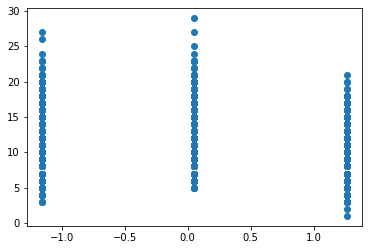

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in add
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value en

New Theta values are : [array([-inf]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array

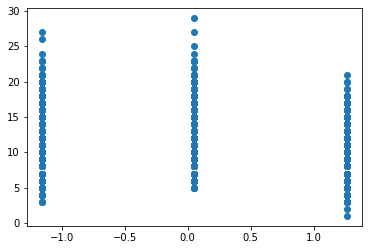

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

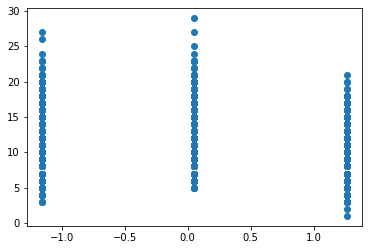

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

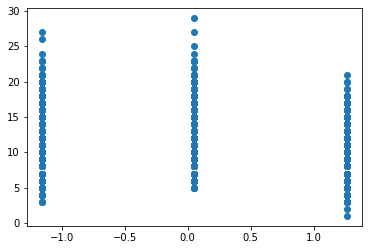

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

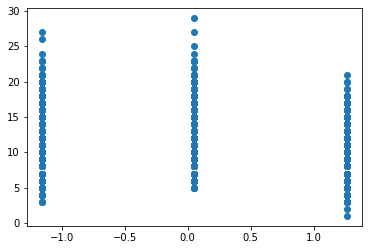

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

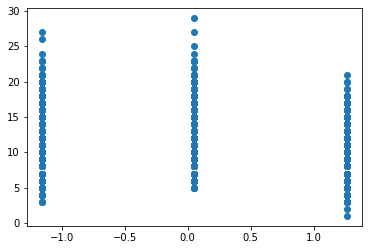

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

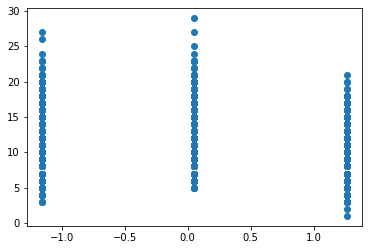

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

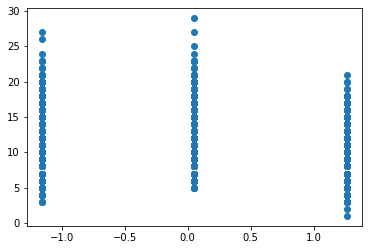

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

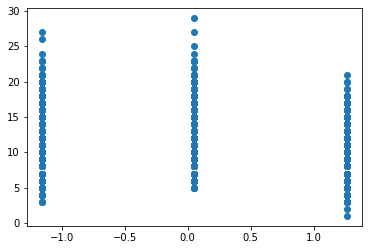

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

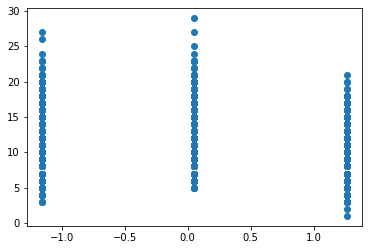

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

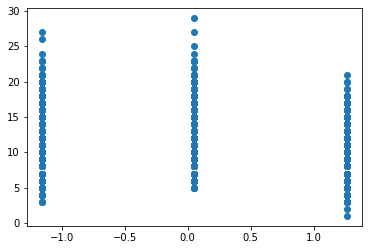

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

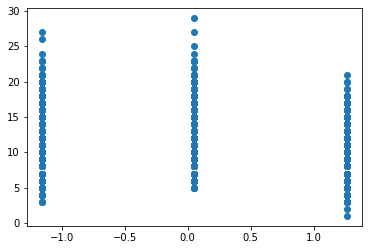

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

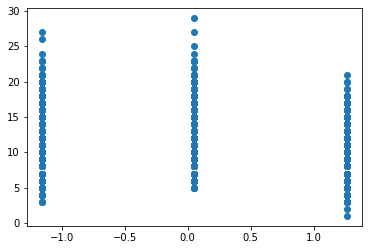

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

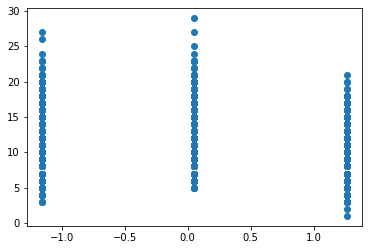

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

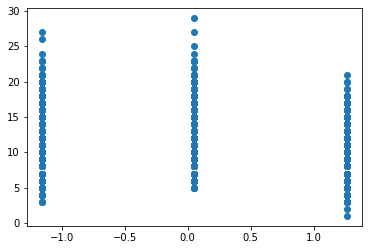

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

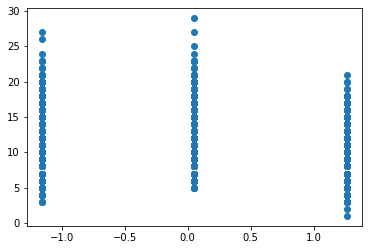

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

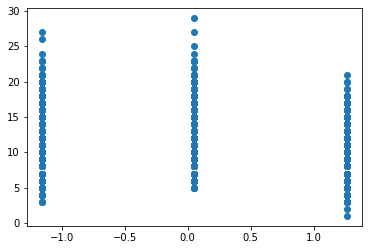

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

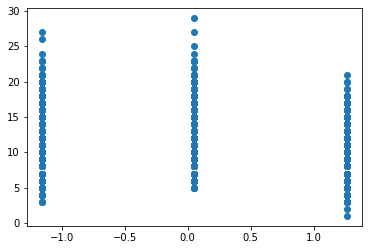

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

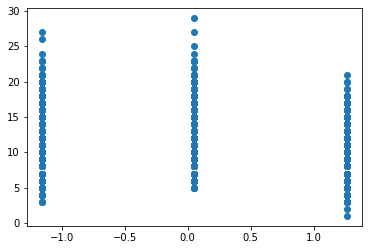

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

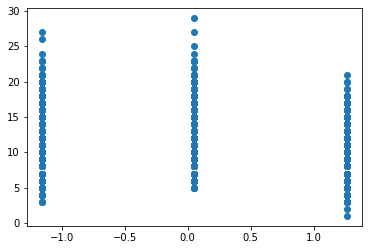

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

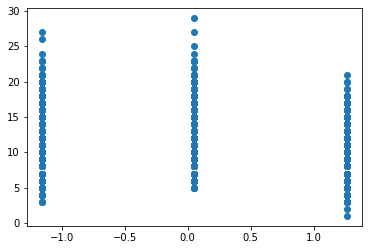

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

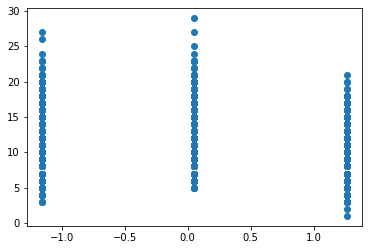

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

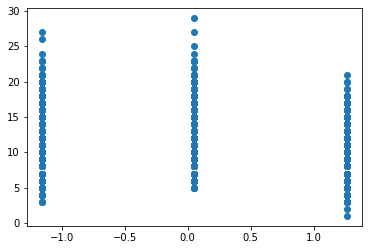

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

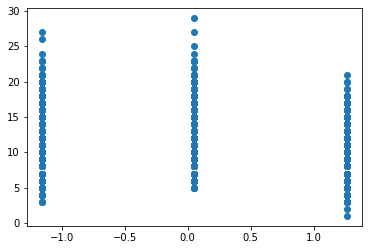

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

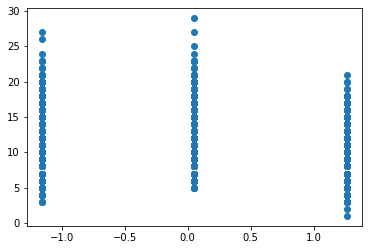

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

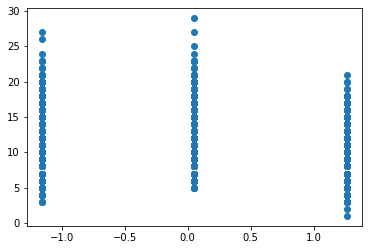

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

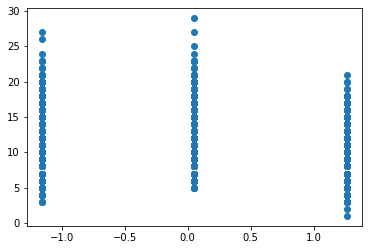

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

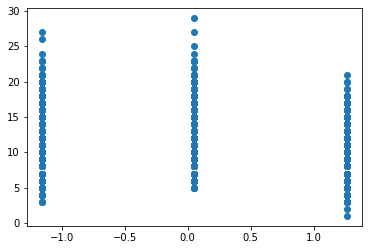

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

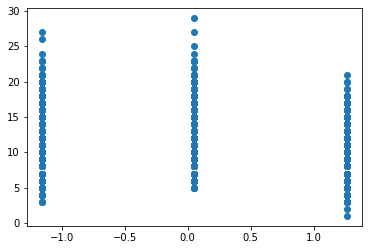

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

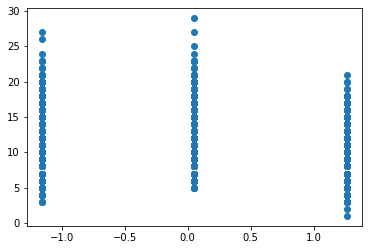

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

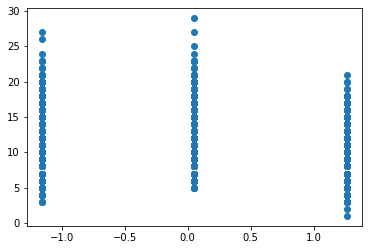

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

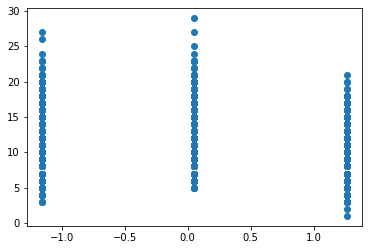

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

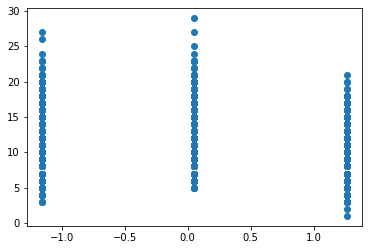

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

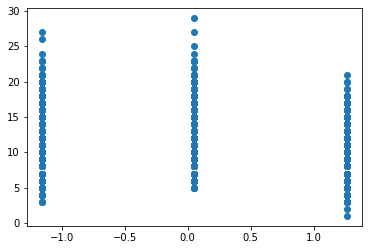

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

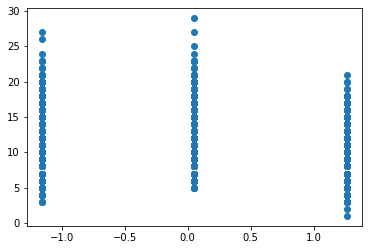

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

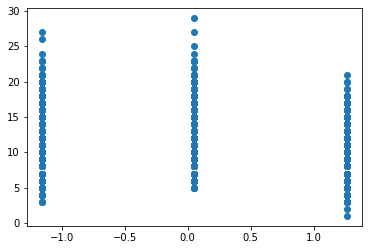

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

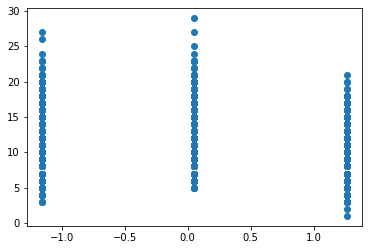

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

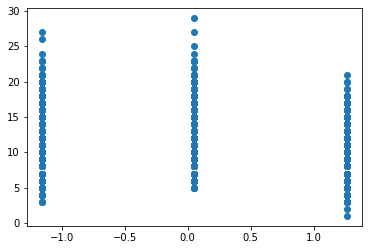

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

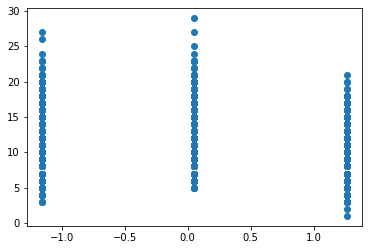

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

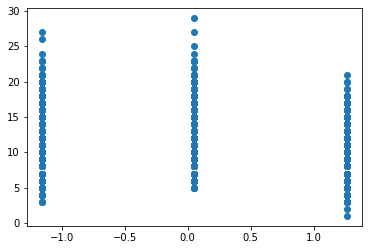

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

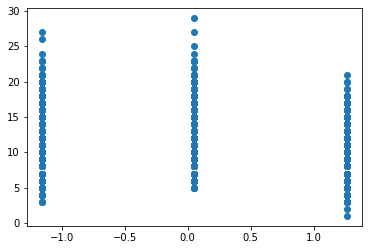

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

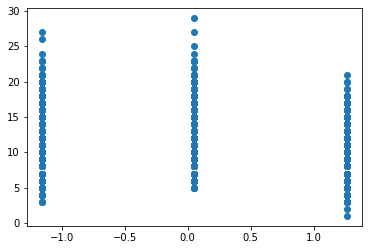

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

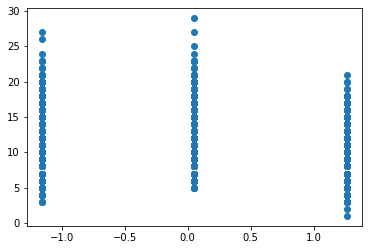

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

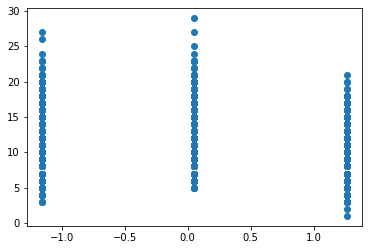

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

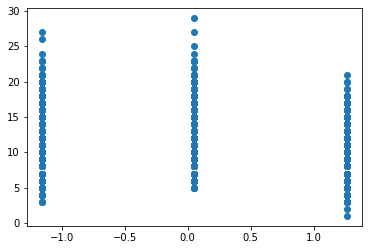

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

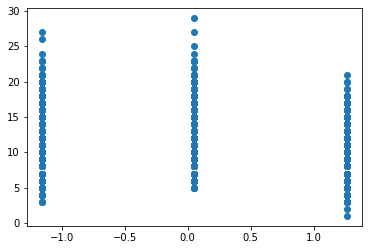

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

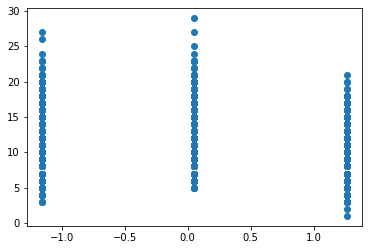

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

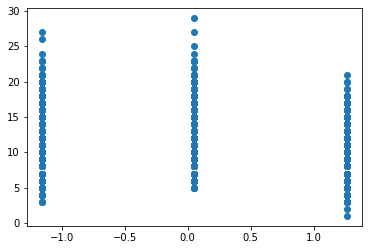

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

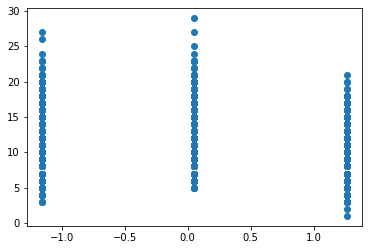

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

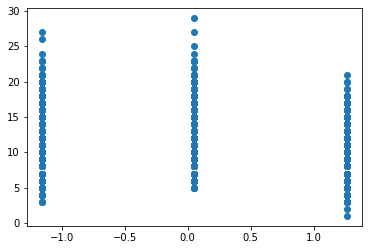

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

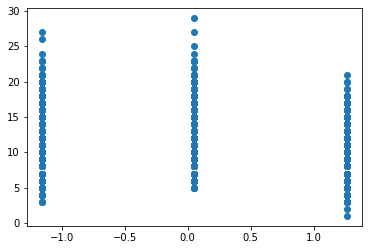

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

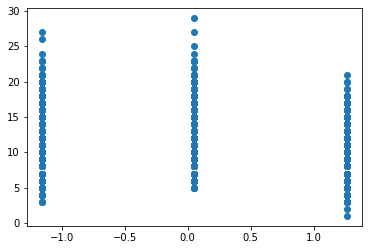

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

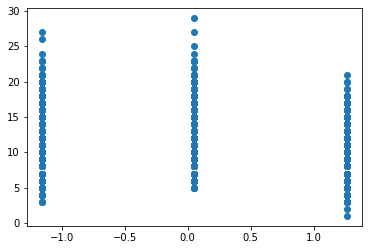

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

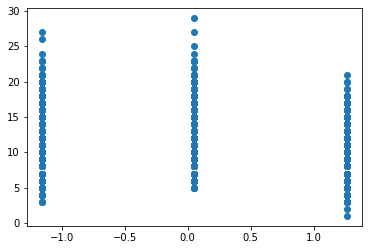

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

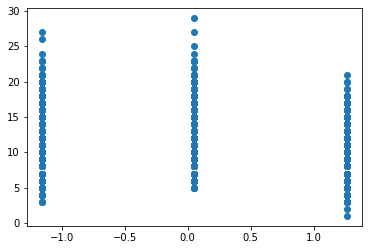

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

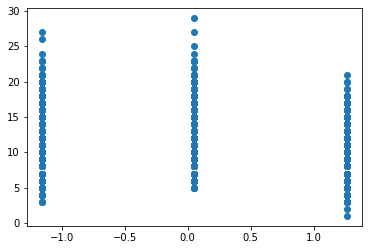

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

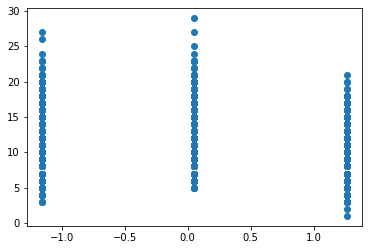

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

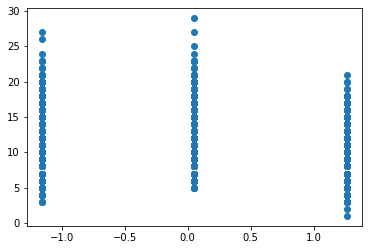

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

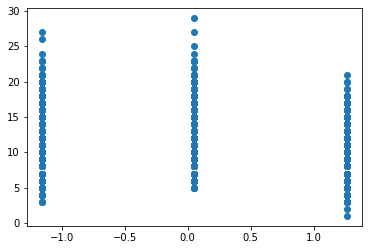

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

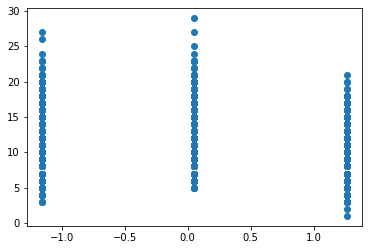

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

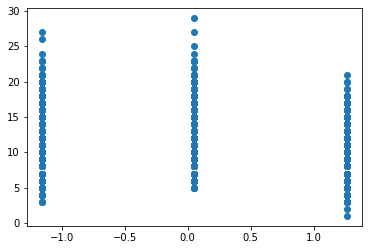

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

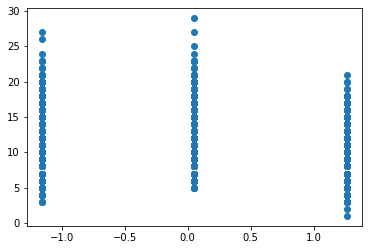

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

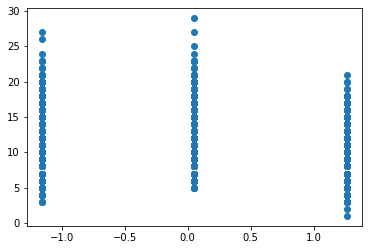

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

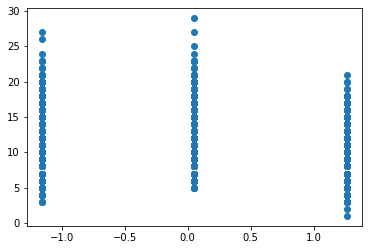

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

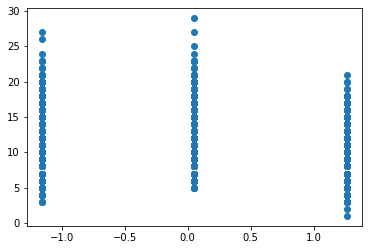

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

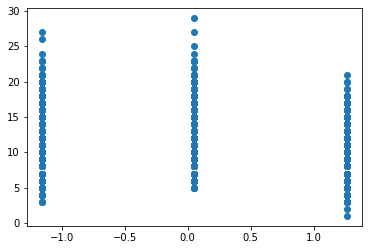

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

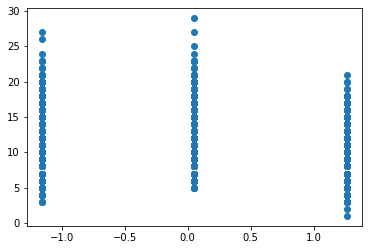

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

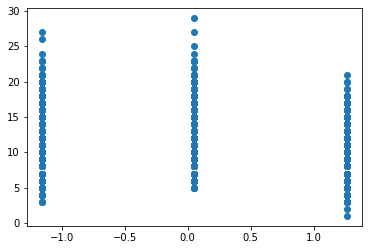

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

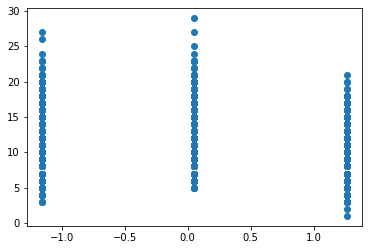

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

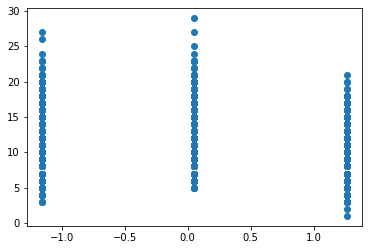

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

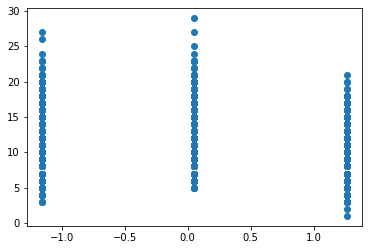

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

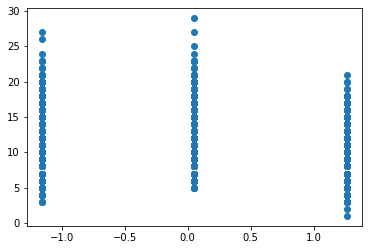

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

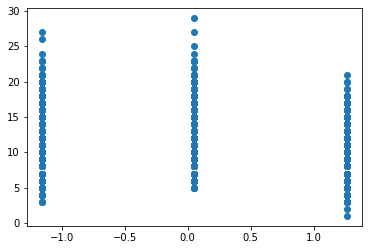

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

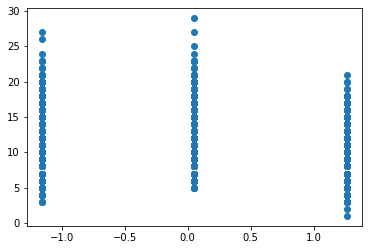

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

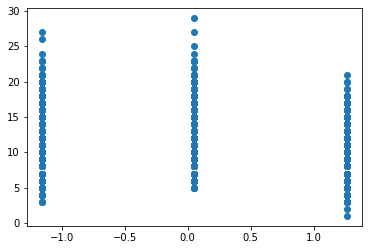

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

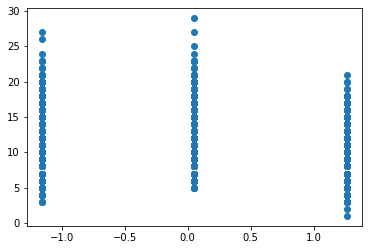

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

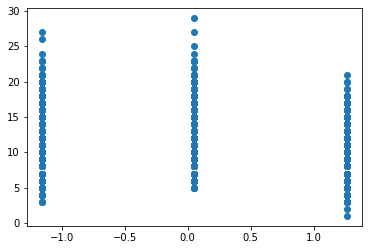

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

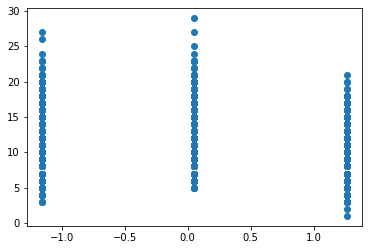

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

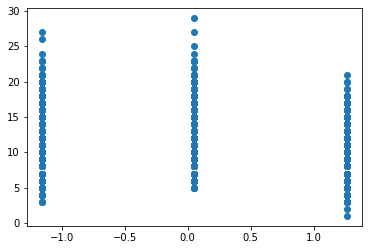

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

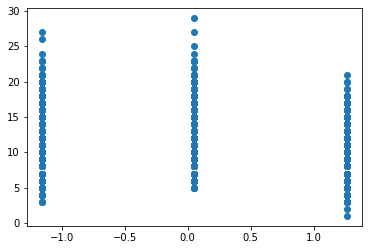

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

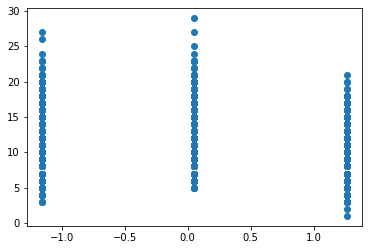

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

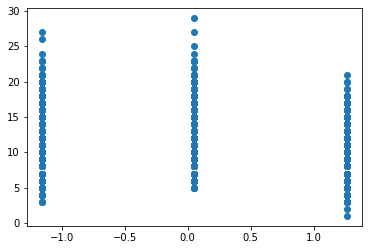

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

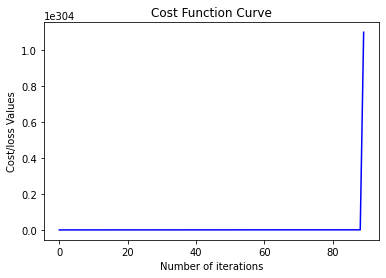

In [ ]:
theta_array=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X[:,4:5],X[:,5:6],X[:,6:7],X[:,7:8],Y,0.001,1000)

New Theta values are : [array([0.09933684]), array([-0.01134196]), array([0.01794743]), array([0.01852579]), array([0.01797154]), array([18.17333421]), array([7.74194972]), array([3.94394901]), array([5.30813263])]


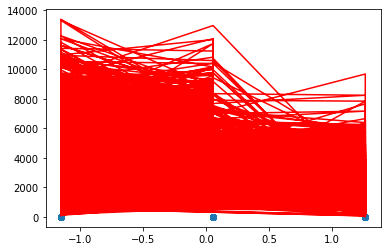

New Theta values are : [array([-39.44874193]), array([10.76444221]), array([-21.64734217]), array([-21.64168197]), array([-19.1256748]), array([-8829.97803187]), array([-3847.18599442]), array([-1920.2131173]), array([-2504.57479004])]
New Theta values are : [array([19251.59827332]), array([-5238.55602148]), array([10530.34908053]), array([10527.82683924]), array([9304.55983267]), array([4305416.06593416]), array([1875818.6986477]), array([936274.14503151]), array([1221258.5565197])]
New Theta values are : [array([-9386835.65661589]), array([2554275.15446269]), array([-5134515.00889924]), array([-5133284.84718224]), array([-4536828.52935452]), array([-2.09927193e+09]), array([-9.14627925e+08]), array([-4.56516633e+08]), array([-5.95471717e+08])]
New Theta values are : [array([4.57691443e+09]), array([-1.24543552e+09]), array([2.50353112e+09]), array([2.50293131e+09]), array([2.212106e+09]), array([1.02358114e+12]), array([4.45962183e+11]), array([2.22592323e+11]), array([2.90345243e+11

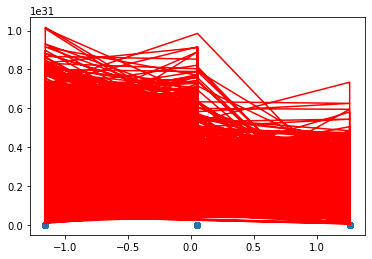

New Theta values are : [array([-2.99880221e+28]), array([8.16011496e+27]), array([-1.6403179e+28]), array([-1.6399249e+28]), array([-1.44937566e+28]), array([-6.70652123e+30]), array([-2.9219519e+30]), array([-1.45842873e+30]), array([-1.90234703e+30])]
New Theta values are : [array([1.46218188e+31]), array([-3.97877933e+30]), array([7.99800369e+30]), array([7.99608747e+30]), array([7.066991e+30]), array([3.27002354e+33]), array([1.42471054e+33]), array([7.11113275e+32]), array([9.27562793e+32])]
New Theta values are : [array([-7.1294327e+33]), array([1.94000759e+33]), array([-3.89973571e+33]), array([-3.89880139e+33]), array([-3.4457845e+33]), array([-1.59442632e+36]), array([-6.9467267e+35]), array([-3.46730752e+35]), array([-4.52269078e+35])]
New Theta values are : [array([3.47623037e+36]), array([-9.45925655e+35]), array([1.90146682e+36]), array([1.90101125e+36]), array([1.68012537e+36]), array([7.77424155e+38]), array([3.387145e+38]), array([1.69061975e+38]), array([2.20521263e+38

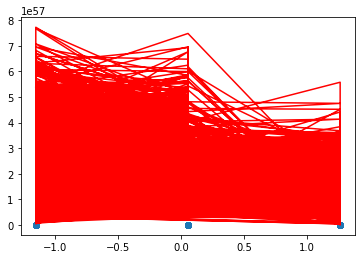

New Theta values are : [array([-2.27763212e+55]), array([6.19772117e+54]), array([-1.24584433e+55]), array([-1.24554584e+55]), array([-1.10082103e+55]), array([-5.09369644e+57]), array([-2.21926323e+57]), array([-1.10769697e+57]), array([-1.44485911e+57])]
New Theta values are : [array([1.11054754e+58]), array([-3.02193841e+57]), array([6.07459539e+57]), array([6.07314e+57]), array([5.36747826e+57]), array([2.4836285e+60]), array([1.08208753e+60]), array([5.40100454e+59]), array([7.04496883e+59])]
New Theta values are : [array([-5.41490361e+60]), array([1.47346283e+60]), array([-2.96190368e+60]), array([-2.96119405e+60]), array([-2.61712141e+60]), array([-1.21098904e+63]), array([-5.27613585e+62]), array([-2.63346844e+62]), array([-3.43504675e+62])]
New Theta values are : [array([2.64024547e+63]), array([-7.18443733e+62]), array([1.44419058e+63]), array([1.44384457e+63]), array([1.27607866e+63]), array([5.90464493e+65]), array([2.57258389e+65]), array([1.28404929e+65]), array([1.674889

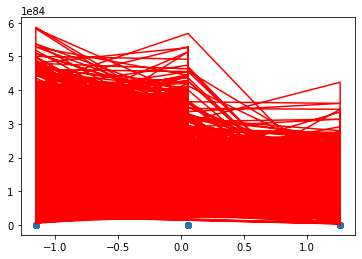

New Theta values are : [array([-1.72989337e+82]), array([4.7072557e+81]), array([-9.46236153e+81]), array([-9.46009447e+81]), array([-8.36088933e+81]), array([-3.86873352e+84]), array([-1.68556139e+84]), array([-8.41311302e+83]), array([-1.09739065e+84])]
New Theta values are : [array([8.43476351e+84]), array([-2.29520439e+84]), array([4.61373996e+84]), array([4.61263456e+84]), array([4.07667463e+84]), array([1.8863505e+87]), array([8.2186058e+86]), array([4.1021383e+86]), array([5.35075212e+86])]
New Theta values are : [array([-4.11269484e+87]), array([1.11911558e+87]), array([-2.24960717e+87]), array([-2.2490682e+87]), array([-1.98774022e+87]), array([-9.19763069e+89]), array([-4.00729879e+89]), array([-2.00015602e+89]), array([-2.60896593e+89])]
New Theta values are : [array([2.00530327e+90]), array([-5.45668039e+89]), array([1.09688289e+90]), array([1.0966201e+90]), array([9.69199546e+89]), array([4.48466021e+92]), array([1.95391336e+92]), array([9.75253348e+91]), array([1.27210214

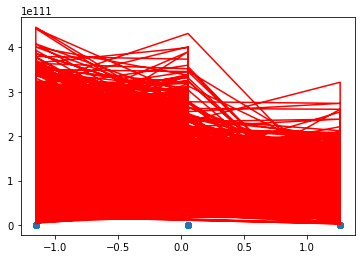

New Theta values are : [array([-1.31387815e+109]), array([3.57522638e+108]), array([-7.1867956e+108]), array([-7.18507374e+108]), array([-6.3502121e+108]), array([-2.93835708e+111]), array([-1.28020739e+111]), array([-6.38987672e+110]), array([-8.33483512e+110])]
New Theta values are : [array([6.40632057e+111]), array([-1.74323976e+111]), array([3.50419987e+111]), array([3.50336031e+111]), array([3.09629126e+111]), array([1.43270952e+114]), array([6.24214577e+113]), array([3.11563128e+113]), array([4.06397089e+113])]
New Theta values are : [array([-3.12364911e+114]), array([8.49983896e+113]), array([-1.70860804e+114]), array([-1.70819868e+114]), array([-1.50971643e+114]), array([-6.98572883e+116]), array([-3.04359935e+116]), array([-1.51914641e+116]), array([-1.98154603e+116])]
New Theta values are : [array([1.52305581e+117]), array([-4.14442489e+116]), array([8.33097863e+116]), array([8.32898263e+116]), array([7.36120577e+116]), array([3.406162e+119]), array([1.48402445e+119]), array(

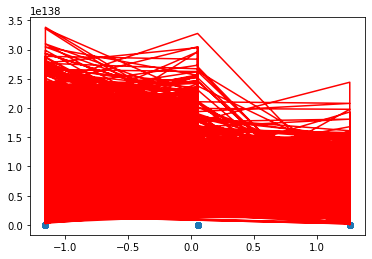

New Theta values are : [array([-9.97908789e+135]), array([2.71543432e+135]), array([-5.45847153e+135]), array([-5.45716376e+135]), array([-4.82307469e+135]), array([-2.2317232e+138]), array([-9.72335377e+137]), array([-4.85320052e+137]), array([-6.33042356e+137])]
New Theta values are : [array([4.86568986e+138]), array([-1.32401492e+138]), array([2.66148869e+138]), array([2.66085103e+138]), array([2.35167641e+138]), array([1.08816287e+141]), array([4.74099681e+140]), array([2.36636543e+140]), array([3.08664259e+140])]
New Theta values are : [array([-2.37245508e+141]), array([6.45574628e+140]), array([-1.29771164e+141]), array([-1.29740073e+141]), array([-1.1466507e+141]), array([-5.30575852e+143]), array([-2.31165617e+143]), array([-1.15381289e+143]), array([-1.50501185e+143])]
New Theta values are : [array([1.15678214e+144]), array([-3.14774853e+143]), array([6.3274945e+143]), array([6.32597852e+143]), array([5.59093849e+143]), array([2.58702756e+146]), array([1.12713728e+146]), array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in add
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([-1.34094913e+152]), array([3.64888987e+151]), array([-7.33487139e+151]), array([-7.33311405e+151]), array([-6.48105103e+151]), array([-2.99889861e+154]), array([-1.30658462e+154]), array([-6.5215329e+153]), array([-8.50656497e+153])]
New Theta values are : [array([6.53831556e+154]), array([-1.77915724e+154]), array([3.57639994e+154]), array([3.57554308e+154]), array([3.16008684e+154]), array([1.46222888e+157]), array([6.37075812e+156]), array([3.17982533e+156]), array([4.14770441e+156])]
New Theta values are : [array([-3.18800837e+157]), array([8.67496852e+156]), array([-1.74381197e+157]), array([-1.74339418e+157]), array([-1.54082243e+157]), array([-7.12966187e+159]), array([-3.10630927e+159]), array([-1.5504467e+159]), array([-2.02237354e+159])]
New Theta values are : [array([1.55443665e+160]), array([-4.22981607e+159]), array([8.50262901e+159]), array([8.5005919e+159]), array([7.51287509e+159]), array([3.47634211e+162]), array([1.5146011e+162]), array(

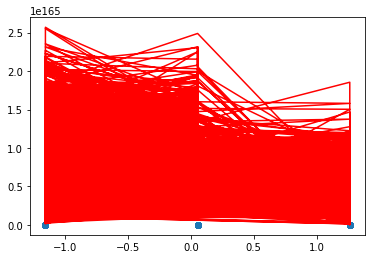

New Theta values are : [array([-7.57925648e+162]), array([2.06241025e+162]), array([-4.14578529e+162]), array([-4.14479201e+162]), array([-3.66319252e+162]), array([-1.69502491e+165]), array([-7.38502285e+164]), array([-3.68607351e+164]), array([-4.80804502e+164])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([3.69555933e+165]), array([-1.0056078e+165]), array([2.0214378e+165]), array([2.02095349e+165]), array([1.78613105e+165]), array([8.26474885e+167]), array([3.60085322e+167]), array([1.79728756e+167]), array([2.34434812e+167])]
New Theta values are : [array([-1.80191274e+168]), array([4.90322937e+167]), array([-9.85630098e+167]), array([-9.85393955e+167]), array([-8.70897202e+167]), array([-4.02979762e+170]), array([-1.75573511e+170]), array([-8.76336989e+169]), array([-1.1430775e+170])]
New Theta values are : [array([8.78592175e+170]), array([-2.39075892e+170]), array([4.80582036e+170]), array([4.80466895e+170]), array([4.24639579e+170]), array([1.96488353e+173]), array([8.5607649e+172]), array([4.27291958e+172]), array([5.573516e+172])]
New Theta values are : [array([-4.2839156e+173]), array([1.16570688e+173]), array([-2.3432634e+173]), array([-2.34270198e+173]), array([-2.07049433e+173]), array([-9.5805488e+175]), array([-4.17413168e+175]), array([-2.083

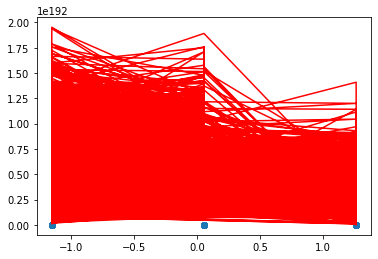

New Theta values are : [array([-5.75655105e+189]), array([1.56642936e+189]), array([-3.14878177e+189]), array([-3.14802736e+189]), array([-2.78224583e+189]), array([-1.28739507e+192]), array([-5.60902789e+191]), array([-2.79962426e+191]), array([-3.65177728e+191])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([2.80682888e+192]), array([-7.63773157e+191]), array([1.53531021e+192]), array([1.53494237e+192]), array([1.35659145e+192]), array([6.27719206e+194]), array([2.73489826e+194]), array([1.36506498e+194]), array([1.7805651e+194])]
New Theta values are : [array([-1.36857786e+195]), array([3.72407112e+194]), array([-7.48599812e+194]), array([-7.48420457e+194]), array([-6.61458576e+194]), array([-3.06068752e+197]), array([-1.33350531e+197]), array([-6.6559017e+196]), array([-8.68183311e+196])]
New Theta values are : [array([6.67303015e+197]), array([-1.81581476e+197]), array([3.65008761e+197]), array([3.6492131e+197]), array([3.22519685e+197]), array([1.49235645e+200]), array([6.50202038e+199]), array([3.24534204e+199]), array([4.23316317e+199])]
New Theta values are : [array([-3.25369367e+200]), array([8.85370643e+199]), array([-1.77974124e+200]), array([-1.77931484e+200]), array([-1.57256933e+200]), array([-7.27656048e+202]), array([-3.17031125e+202]), array([

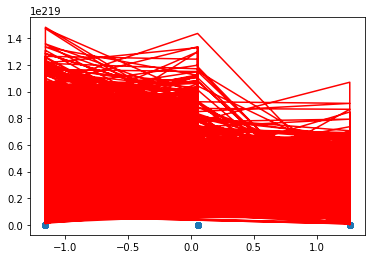

New Theta values are : [array([-4.37218084e+216]), array([1.18972496e+216]), array([-2.39154369e+216]), array([-2.3909707e+216]), array([-2.11315453e+216]), array([-9.77794517e+218]), array([-4.26013494e+218]), array([-2.12635369e+218]), array([-2.77357579e+218])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([2.13182569e+219]), array([-5.80096369e+218]), array([1.16608953e+219]), array([1.16581015e+219]), array([1.03035013e+219]), array([4.76761495e+221]), array([2.07719339e+221]), array([1.03678589e+221]), array([1.35236404e+221])]
New Theta values are : [array([-1.03945398e+222]), array([2.82848398e+221]), array([-5.68572002e+221]), array([-5.68435779e+221]), array([-5.02387017e+221]), array([-2.32463487e+224]), array([-1.01281589e+224]), array([-5.05525021e+223]), array([-6.59397338e+223])]
New Theta values are : [array([5.0682595e+224]), array([-1.37913664e+224]), array([2.77229247e+224]), array([2.77162827e+224]), array([2.44958201e+224]), array([1.13346555e+227]), array([4.9383752e+226]), array([2.46488256e+226]), array([3.21514649e+226])]
New Theta values are : [array([-2.47122574e+227]), array([6.72451356e+226]), array([-1.35173831e+227]), array([-1.35141445e+227]), array([-1.19438835e+227]), array([-5.52664921e+229]), array([-2.40789563e+229]), array(

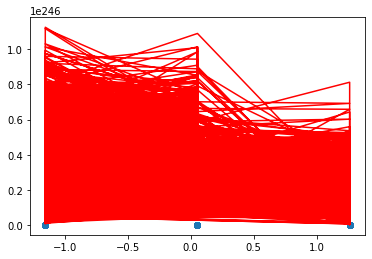

New Theta values are : [array([-3.32073235e+243]), array([9.03612703e+242]), array([-1.8164108e+243]), array([-1.81597561e+243]), array([-1.60497035e+243]), array([-7.42648578e+245]), array([-3.23563193e+245]), array([-1.61499529e+245]), array([-2.10656951e+245])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([1.61915136e+246]), array([-4.40591286e+245]), array([8.85661264e+245]), array([8.85449071e+245]), array([7.82565303e+245]), array([3.62107007e+248]), array([1.57765736e+248]), array([7.87453353e+247]), array([1.02713936e+248])]
New Theta values are : [array([-7.89479803e+248]), array([2.14827304e+248]), array([-4.31838368e+248]), array([-4.31734905e+248]), array([-3.81569949e+248]), array([-1.76559262e+251]), array([-7.69247801e+250]), array([-3.83953307e+250]), array([-5.00821478e+250])]
New Theta values are : [array([3.84941381e+251]), array([-1.04747352e+251]), array([2.10559481e+251]), array([2.10509034e+251]), array([1.86049171e+251]), array([8.60882899e+253]), array([3.75076486e+253]), array([1.87211269e+253]), array([2.44194862e+253])]
New Theta values are : [array([-1.87693043e+254]), array([5.10736187e+253]), array([-1.0266641e+254]), array([-1.02641813e+254]), array([-9.07154617e+253]), array([-4.19756719e+256]), array([-1.82883033e+256]), array

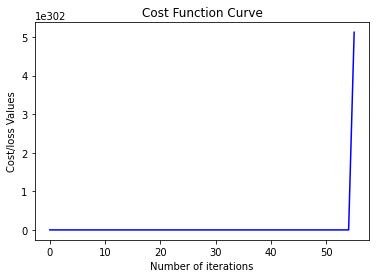

In [ ]:
theta_array=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X[:,4:5],X[:,5:6],X[:,6:7],X[:,7:8],Y,0.01,100)

New Theta values are : [array([0.09933684]), array([-0.01134196]), array([0.01794743]), array([0.01852579]), array([0.01797154]), array([18.17333421]), array([7.74194972]), array([3.94394901]), array([5.30813263])]


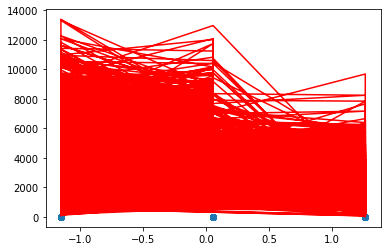

New Theta values are : [array([-39.44874193]), array([10.76444221]), array([-21.64734217]), array([-21.64168197]), array([-19.1256748]), array([-8829.97803187]), array([-3847.18599442]), array([-1920.2131173]), array([-2504.57479004])]
New Theta values are : [array([19251.59827332]), array([-5238.55602148]), array([10530.34908053]), array([10527.82683924]), array([9304.55983267]), array([4305416.06593416]), array([1875818.6986477]), array([936274.14503151]), array([1221258.5565197])]
New Theta values are : [array([-9386835.65661589]), array([2554275.15446269]), array([-5134515.00889924]), array([-5133284.84718224]), array([-4536828.52935452]), array([-2.09927193e+09]), array([-9.14627925e+08]), array([-4.56516633e+08]), array([-5.95471717e+08])]
New Theta values are : [array([4.57691443e+09]), array([-1.24543552e+09]), array([2.50353112e+09]), array([2.50293131e+09]), array([2.212106e+09]), array([1.02358114e+12]), array([4.45962183e+11]), array([2.22592323e+11]), array([2.90345243e+11

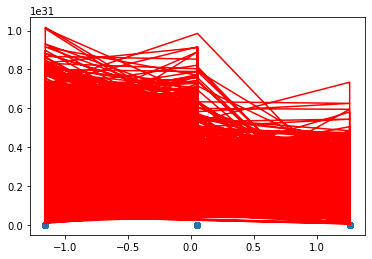

New Theta values are : [array([-2.99880221e+28]), array([8.16011496e+27]), array([-1.6403179e+28]), array([-1.6399249e+28]), array([-1.44937566e+28]), array([-6.70652123e+30]), array([-2.9219519e+30]), array([-1.45842873e+30]), array([-1.90234703e+30])]
New Theta values are : [array([1.46218188e+31]), array([-3.97877933e+30]), array([7.99800369e+30]), array([7.99608747e+30]), array([7.066991e+30]), array([3.27002354e+33]), array([1.42471054e+33]), array([7.11113275e+32]), array([9.27562793e+32])]
New Theta values are : [array([-7.1294327e+33]), array([1.94000759e+33]), array([-3.89973571e+33]), array([-3.89880139e+33]), array([-3.4457845e+33]), array([-1.59442632e+36]), array([-6.9467267e+35]), array([-3.46730752e+35]), array([-4.52269078e+35])]
New Theta values are : [array([3.47623037e+36]), array([-9.45925655e+35]), array([1.90146682e+36]), array([1.90101125e+36]), array([1.68012537e+36]), array([7.77424155e+38]), array([3.387145e+38]), array([1.69061975e+38]), array([2.20521263e+38

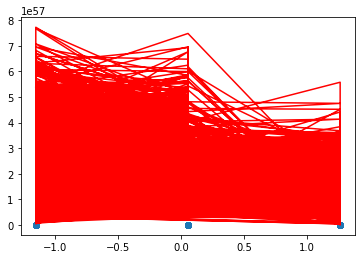

New Theta values are : [array([-2.27763212e+55]), array([6.19772117e+54]), array([-1.24584433e+55]), array([-1.24554584e+55]), array([-1.10082103e+55]), array([-5.09369644e+57]), array([-2.21926323e+57]), array([-1.10769697e+57]), array([-1.44485911e+57])]
New Theta values are : [array([1.11054754e+58]), array([-3.02193841e+57]), array([6.07459539e+57]), array([6.07314e+57]), array([5.36747826e+57]), array([2.4836285e+60]), array([1.08208753e+60]), array([5.40100454e+59]), array([7.04496883e+59])]
New Theta values are : [array([-5.41490361e+60]), array([1.47346283e+60]), array([-2.96190368e+60]), array([-2.96119405e+60]), array([-2.61712141e+60]), array([-1.21098904e+63]), array([-5.27613585e+62]), array([-2.63346844e+62]), array([-3.43504675e+62])]
New Theta values are : [array([2.64024547e+63]), array([-7.18443733e+62]), array([1.44419058e+63]), array([1.44384457e+63]), array([1.27607866e+63]), array([5.90464493e+65]), array([2.57258389e+65]), array([1.28404929e+65]), array([1.674889

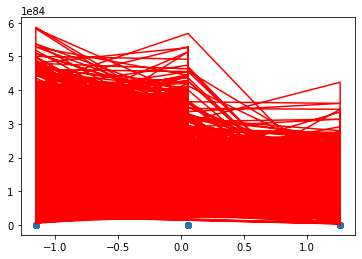

New Theta values are : [array([-1.72989337e+82]), array([4.7072557e+81]), array([-9.46236153e+81]), array([-9.46009447e+81]), array([-8.36088933e+81]), array([-3.86873352e+84]), array([-1.68556139e+84]), array([-8.41311302e+83]), array([-1.09739065e+84])]
New Theta values are : [array([8.43476351e+84]), array([-2.29520439e+84]), array([4.61373996e+84]), array([4.61263456e+84]), array([4.07667463e+84]), array([1.8863505e+87]), array([8.2186058e+86]), array([4.1021383e+86]), array([5.35075212e+86])]
New Theta values are : [array([-4.11269484e+87]), array([1.11911558e+87]), array([-2.24960717e+87]), array([-2.2490682e+87]), array([-1.98774022e+87]), array([-9.19763069e+89]), array([-4.00729879e+89]), array([-2.00015602e+89]), array([-2.60896593e+89])]
New Theta values are : [array([2.00530327e+90]), array([-5.45668039e+89]), array([1.09688289e+90]), array([1.0966201e+90]), array([9.69199546e+89]), array([4.48466021e+92]), array([1.95391336e+92]), array([9.75253348e+91]), array([1.27210214

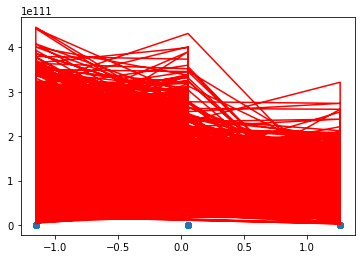

New Theta values are : [array([-1.31387815e+109]), array([3.57522638e+108]), array([-7.1867956e+108]), array([-7.18507374e+108]), array([-6.3502121e+108]), array([-2.93835708e+111]), array([-1.28020739e+111]), array([-6.38987672e+110]), array([-8.33483512e+110])]
New Theta values are : [array([6.40632057e+111]), array([-1.74323976e+111]), array([3.50419987e+111]), array([3.50336031e+111]), array([3.09629126e+111]), array([1.43270952e+114]), array([6.24214577e+113]), array([3.11563128e+113]), array([4.06397089e+113])]
New Theta values are : [array([-3.12364911e+114]), array([8.49983896e+113]), array([-1.70860804e+114]), array([-1.70819868e+114]), array([-1.50971643e+114]), array([-6.98572883e+116]), array([-3.04359935e+116]), array([-1.51914641e+116]), array([-1.98154603e+116])]
New Theta values are : [array([1.52305581e+117]), array([-4.14442489e+116]), array([8.33097863e+116]), array([8.32898263e+116]), array([7.36120577e+116]), array([3.406162e+119]), array([1.48402445e+119]), array(

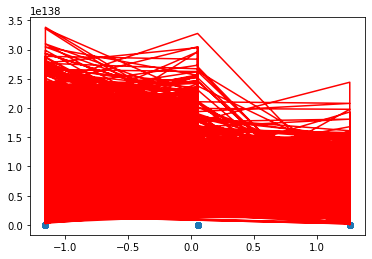

New Theta values are : [array([-9.97908789e+135]), array([2.71543432e+135]), array([-5.45847153e+135]), array([-5.45716376e+135]), array([-4.82307469e+135]), array([-2.2317232e+138]), array([-9.72335377e+137]), array([-4.85320052e+137]), array([-6.33042356e+137])]
New Theta values are : [array([4.86568986e+138]), array([-1.32401492e+138]), array([2.66148869e+138]), array([2.66085103e+138]), array([2.35167641e+138]), array([1.08816287e+141]), array([4.74099681e+140]), array([2.36636543e+140]), array([3.08664259e+140])]
New Theta values are : [array([-2.37245508e+141]), array([6.45574628e+140]), array([-1.29771164e+141]), array([-1.29740073e+141]), array([-1.1466507e+141]), array([-5.30575852e+143]), array([-2.31165617e+143]), array([-1.15381289e+143]), array([-1.50501185e+143])]
New Theta values are : [array([1.15678214e+144]), array([-3.14774853e+143]), array([6.3274945e+143]), array([6.32597852e+143]), array([5.59093849e+143]), array([2.58702756e+146]), array([1.12713728e+146]), array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in add
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([-1.34094913e+152]), array([3.64888987e+151]), array([-7.33487139e+151]), array([-7.33311405e+151]), array([-6.48105103e+151]), array([-2.99889861e+154]), array([-1.30658462e+154]), array([-6.5215329e+153]), array([-8.50656497e+153])]
New Theta values are : [array([6.53831556e+154]), array([-1.77915724e+154]), array([3.57639994e+154]), array([3.57554308e+154]), array([3.16008684e+154]), array([1.46222888e+157]), array([6.37075812e+156]), array([3.17982533e+156]), array([4.14770441e+156])]
New Theta values are : [array([-3.18800837e+157]), array([8.67496852e+156]), array([-1.74381197e+157]), array([-1.74339418e+157]), array([-1.54082243e+157]), array([-7.12966187e+159]), array([-3.10630927e+159]), array([-1.5504467e+159]), array([-2.02237354e+159])]
New Theta values are : [array([1.55443665e+160]), array([-4.22981607e+159]), array([8.50262901e+159]), array([8.5005919e+159]), array([7.51287509e+159]), array([3.47634211e+162]), array([1.5146011e+162]), array(

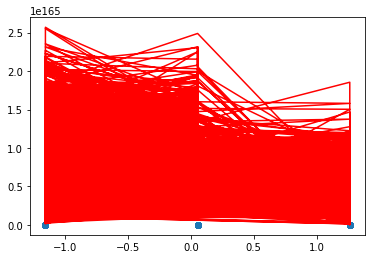

New Theta values are : [array([-7.57925648e+162]), array([2.06241025e+162]), array([-4.14578529e+162]), array([-4.14479201e+162]), array([-3.66319252e+162]), array([-1.69502491e+165]), array([-7.38502285e+164]), array([-3.68607351e+164]), array([-4.80804502e+164])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([3.69555933e+165]), array([-1.0056078e+165]), array([2.0214378e+165]), array([2.02095349e+165]), array([1.78613105e+165]), array([8.26474885e+167]), array([3.60085322e+167]), array([1.79728756e+167]), array([2.34434812e+167])]
New Theta values are : [array([-1.80191274e+168]), array([4.90322937e+167]), array([-9.85630098e+167]), array([-9.85393955e+167]), array([-8.70897202e+167]), array([-4.02979762e+170]), array([-1.75573511e+170]), array([-8.76336989e+169]), array([-1.1430775e+170])]
New Theta values are : [array([8.78592175e+170]), array([-2.39075892e+170]), array([4.80582036e+170]), array([4.80466895e+170]), array([4.24639579e+170]), array([1.96488353e+173]), array([8.5607649e+172]), array([4.27291958e+172]), array([5.573516e+172])]
New Theta values are : [array([-4.2839156e+173]), array([1.16570688e+173]), array([-2.3432634e+173]), array([-2.34270198e+173]), array([-2.07049433e+173]), array([-9.5805488e+175]), array([-4.17413168e+175]), array([-2.083

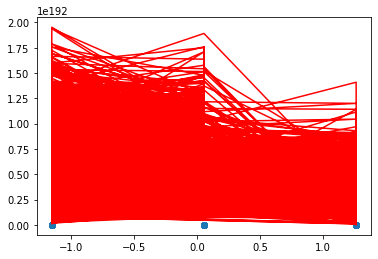

New Theta values are : [array([-5.75655105e+189]), array([1.56642936e+189]), array([-3.14878177e+189]), array([-3.14802736e+189]), array([-2.78224583e+189]), array([-1.28739507e+192]), array([-5.60902789e+191]), array([-2.79962426e+191]), array([-3.65177728e+191])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([2.80682888e+192]), array([-7.63773157e+191]), array([1.53531021e+192]), array([1.53494237e+192]), array([1.35659145e+192]), array([6.27719206e+194]), array([2.73489826e+194]), array([1.36506498e+194]), array([1.7805651e+194])]
New Theta values are : [array([-1.36857786e+195]), array([3.72407112e+194]), array([-7.48599812e+194]), array([-7.48420457e+194]), array([-6.61458576e+194]), array([-3.06068752e+197]), array([-1.33350531e+197]), array([-6.6559017e+196]), array([-8.68183311e+196])]
New Theta values are : [array([6.67303015e+197]), array([-1.81581476e+197]), array([3.65008761e+197]), array([3.6492131e+197]), array([3.22519685e+197]), array([1.49235645e+200]), array([6.50202038e+199]), array([3.24534204e+199]), array([4.23316317e+199])]
New Theta values are : [array([-3.25369367e+200]), array([8.85370643e+199]), array([-1.77974124e+200]), array([-1.77931484e+200]), array([-1.57256933e+200]), array([-7.27656048e+202]), array([-3.17031125e+202]), array([

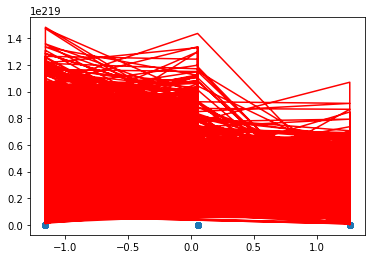

New Theta values are : [array([-4.37218084e+216]), array([1.18972496e+216]), array([-2.39154369e+216]), array([-2.3909707e+216]), array([-2.11315453e+216]), array([-9.77794517e+218]), array([-4.26013494e+218]), array([-2.12635369e+218]), array([-2.77357579e+218])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([2.13182569e+219]), array([-5.80096369e+218]), array([1.16608953e+219]), array([1.16581015e+219]), array([1.03035013e+219]), array([4.76761495e+221]), array([2.07719339e+221]), array([1.03678589e+221]), array([1.35236404e+221])]
New Theta values are : [array([-1.03945398e+222]), array([2.82848398e+221]), array([-5.68572002e+221]), array([-5.68435779e+221]), array([-5.02387017e+221]), array([-2.32463487e+224]), array([-1.01281589e+224]), array([-5.05525021e+223]), array([-6.59397338e+223])]
New Theta values are : [array([5.0682595e+224]), array([-1.37913664e+224]), array([2.77229247e+224]), array([2.77162827e+224]), array([2.44958201e+224]), array([1.13346555e+227]), array([4.9383752e+226]), array([2.46488256e+226]), array([3.21514649e+226])]
New Theta values are : [array([-2.47122574e+227]), array([6.72451356e+226]), array([-1.35173831e+227]), array([-1.35141445e+227]), array([-1.19438835e+227]), array([-5.52664921e+229]), array([-2.40789563e+229]), array(

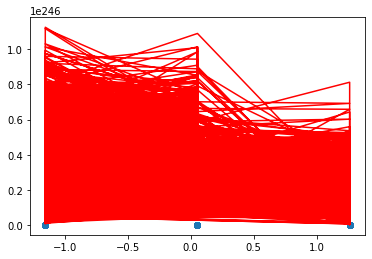

New Theta values are : [array([-3.32073235e+243]), array([9.03612703e+242]), array([-1.8164108e+243]), array([-1.81597561e+243]), array([-1.60497035e+243]), array([-7.42648578e+245]), array([-3.23563193e+245]), array([-1.61499529e+245]), array([-2.10656951e+245])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([1.61915136e+246]), array([-4.40591286e+245]), array([8.85661264e+245]), array([8.85449071e+245]), array([7.82565303e+245]), array([3.62107007e+248]), array([1.57765736e+248]), array([7.87453353e+247]), array([1.02713936e+248])]
New Theta values are : [array([-7.89479803e+248]), array([2.14827304e+248]), array([-4.31838368e+248]), array([-4.31734905e+248]), array([-3.81569949e+248]), array([-1.76559262e+251]), array([-7.69247801e+250]), array([-3.83953307e+250]), array([-5.00821478e+250])]
New Theta values are : [array([3.84941381e+251]), array([-1.04747352e+251]), array([2.10559481e+251]), array([2.10509034e+251]), array([1.86049171e+251]), array([8.60882899e+253]), array([3.75076486e+253]), array([1.87211269e+253]), array([2.44194862e+253])]
New Theta values are : [array([-1.87693043e+254]), array([5.10736187e+253]), array([-1.0266641e+254]), array([-1.02641813e+254]), array([-9.07154617e+253]), array([-4.19756719e+256]), array([-1.82883033e+256]), array

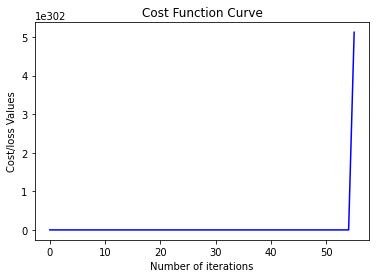

In [ ]:
theta_array=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X[:,4:5],X[:,5:6],X[:,6:7],X[:,7:8],Y,0.01,100)

New Theta values are : [array([0.09933684]), array([-0.01134196]), array([0.01794743]), array([0.01852579]), array([0.01797154]), array([18.17333421]), array([7.74194972]), array([3.94394901]), array([5.30813263])]


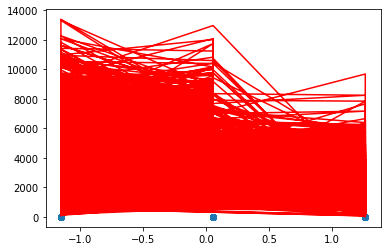

New Theta values are : [array([-39.44874193]), array([10.76444221]), array([-21.64734217]), array([-21.64168197]), array([-19.1256748]), array([-8829.97803187]), array([-3847.18599442]), array([-1920.2131173]), array([-2504.57479004])]
New Theta values are : [array([19251.59827332]), array([-5238.55602148]), array([10530.34908053]), array([10527.82683924]), array([9304.55983267]), array([4305416.06593416]), array([1875818.6986477]), array([936274.14503151]), array([1221258.5565197])]
New Theta values are : [array([-9386835.65661589]), array([2554275.15446269]), array([-5134515.00889924]), array([-5133284.84718224]), array([-4536828.52935452]), array([-2.09927193e+09]), array([-9.14627925e+08]), array([-4.56516633e+08]), array([-5.95471717e+08])]
New Theta values are : [array([4.57691443e+09]), array([-1.24543552e+09]), array([2.50353112e+09]), array([2.50293131e+09]), array([2.212106e+09]), array([1.02358114e+12]), array([4.45962183e+11]), array([2.22592323e+11]), array([2.90345243e+11

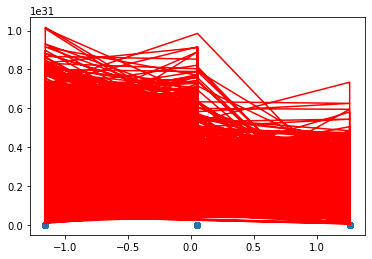

New Theta values are : [array([-2.99880221e+28]), array([8.16011496e+27]), array([-1.6403179e+28]), array([-1.6399249e+28]), array([-1.44937566e+28]), array([-6.70652123e+30]), array([-2.9219519e+30]), array([-1.45842873e+30]), array([-1.90234703e+30])]
New Theta values are : [array([1.46218188e+31]), array([-3.97877933e+30]), array([7.99800369e+30]), array([7.99608747e+30]), array([7.066991e+30]), array([3.27002354e+33]), array([1.42471054e+33]), array([7.11113275e+32]), array([9.27562793e+32])]
New Theta values are : [array([-7.1294327e+33]), array([1.94000759e+33]), array([-3.89973571e+33]), array([-3.89880139e+33]), array([-3.4457845e+33]), array([-1.59442632e+36]), array([-6.9467267e+35]), array([-3.46730752e+35]), array([-4.52269078e+35])]
New Theta values are : [array([3.47623037e+36]), array([-9.45925655e+35]), array([1.90146682e+36]), array([1.90101125e+36]), array([1.68012537e+36]), array([7.77424155e+38]), array([3.387145e+38]), array([1.69061975e+38]), array([2.20521263e+38

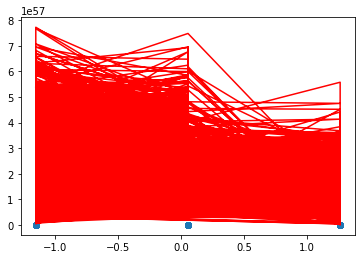

New Theta values are : [array([-2.27763212e+55]), array([6.19772117e+54]), array([-1.24584433e+55]), array([-1.24554584e+55]), array([-1.10082103e+55]), array([-5.09369644e+57]), array([-2.21926323e+57]), array([-1.10769697e+57]), array([-1.44485911e+57])]
New Theta values are : [array([1.11054754e+58]), array([-3.02193841e+57]), array([6.07459539e+57]), array([6.07314e+57]), array([5.36747826e+57]), array([2.4836285e+60]), array([1.08208753e+60]), array([5.40100454e+59]), array([7.04496883e+59])]
New Theta values are : [array([-5.41490361e+60]), array([1.47346283e+60]), array([-2.96190368e+60]), array([-2.96119405e+60]), array([-2.61712141e+60]), array([-1.21098904e+63]), array([-5.27613585e+62]), array([-2.63346844e+62]), array([-3.43504675e+62])]
New Theta values are : [array([2.64024547e+63]), array([-7.18443733e+62]), array([1.44419058e+63]), array([1.44384457e+63]), array([1.27607866e+63]), array([5.90464493e+65]), array([2.57258389e+65]), array([1.28404929e+65]), array([1.674889

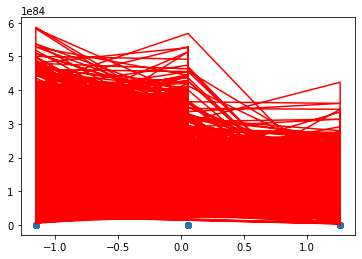

New Theta values are : [array([-1.72989337e+82]), array([4.7072557e+81]), array([-9.46236153e+81]), array([-9.46009447e+81]), array([-8.36088933e+81]), array([-3.86873352e+84]), array([-1.68556139e+84]), array([-8.41311302e+83]), array([-1.09739065e+84])]
New Theta values are : [array([8.43476351e+84]), array([-2.29520439e+84]), array([4.61373996e+84]), array([4.61263456e+84]), array([4.07667463e+84]), array([1.8863505e+87]), array([8.2186058e+86]), array([4.1021383e+86]), array([5.35075212e+86])]
New Theta values are : [array([-4.11269484e+87]), array([1.11911558e+87]), array([-2.24960717e+87]), array([-2.2490682e+87]), array([-1.98774022e+87]), array([-9.19763069e+89]), array([-4.00729879e+89]), array([-2.00015602e+89]), array([-2.60896593e+89])]
New Theta values are : [array([2.00530327e+90]), array([-5.45668039e+89]), array([1.09688289e+90]), array([1.0966201e+90]), array([9.69199546e+89]), array([4.48466021e+92]), array([1.95391336e+92]), array([9.75253348e+91]), array([1.27210214

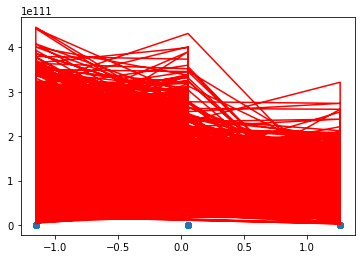

New Theta values are : [array([-1.31387815e+109]), array([3.57522638e+108]), array([-7.1867956e+108]), array([-7.18507374e+108]), array([-6.3502121e+108]), array([-2.93835708e+111]), array([-1.28020739e+111]), array([-6.38987672e+110]), array([-8.33483512e+110])]
New Theta values are : [array([6.40632057e+111]), array([-1.74323976e+111]), array([3.50419987e+111]), array([3.50336031e+111]), array([3.09629126e+111]), array([1.43270952e+114]), array([6.24214577e+113]), array([3.11563128e+113]), array([4.06397089e+113])]
New Theta values are : [array([-3.12364911e+114]), array([8.49983896e+113]), array([-1.70860804e+114]), array([-1.70819868e+114]), array([-1.50971643e+114]), array([-6.98572883e+116]), array([-3.04359935e+116]), array([-1.51914641e+116]), array([-1.98154603e+116])]
New Theta values are : [array([1.52305581e+117]), array([-4.14442489e+116]), array([8.33097863e+116]), array([8.32898263e+116]), array([7.36120577e+116]), array([3.406162e+119]), array([1.48402445e+119]), array(

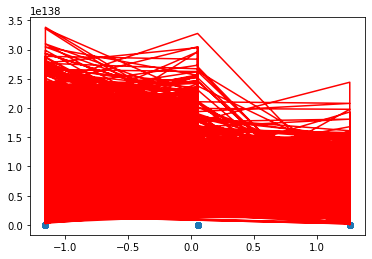

New Theta values are : [array([-9.97908789e+135]), array([2.71543432e+135]), array([-5.45847153e+135]), array([-5.45716376e+135]), array([-4.82307469e+135]), array([-2.2317232e+138]), array([-9.72335377e+137]), array([-4.85320052e+137]), array([-6.33042356e+137])]
New Theta values are : [array([4.86568986e+138]), array([-1.32401492e+138]), array([2.66148869e+138]), array([2.66085103e+138]), array([2.35167641e+138]), array([1.08816287e+141]), array([4.74099681e+140]), array([2.36636543e+140]), array([3.08664259e+140])]
New Theta values are : [array([-2.37245508e+141]), array([6.45574628e+140]), array([-1.29771164e+141]), array([-1.29740073e+141]), array([-1.1466507e+141]), array([-5.30575852e+143]), array([-2.31165617e+143]), array([-1.15381289e+143]), array([-1.50501185e+143])]
New Theta values are : [array([1.15678214e+144]), array([-3.14774853e+143]), array([6.3274945e+143]), array([6.32597852e+143]), array([5.59093849e+143]), array([2.58702756e+146]), array([1.12713728e+146]), array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in add
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([-1.34094913e+152]), array([3.64888987e+151]), array([-7.33487139e+151]), array([-7.33311405e+151]), array([-6.48105103e+151]), array([-2.99889861e+154]), array([-1.30658462e+154]), array([-6.5215329e+153]), array([-8.50656497e+153])]
New Theta values are : [array([6.53831556e+154]), array([-1.77915724e+154]), array([3.57639994e+154]), array([3.57554308e+154]), array([3.16008684e+154]), array([1.46222888e+157]), array([6.37075812e+156]), array([3.17982533e+156]), array([4.14770441e+156])]
New Theta values are : [array([-3.18800837e+157]), array([8.67496852e+156]), array([-1.74381197e+157]), array([-1.74339418e+157]), array([-1.54082243e+157]), array([-7.12966187e+159]), array([-3.10630927e+159]), array([-1.5504467e+159]), array([-2.02237354e+159])]
New Theta values are : [array([1.55443665e+160]), array([-4.22981607e+159]), array([8.50262901e+159]), array([8.5005919e+159]), array([7.51287509e+159]), array([3.47634211e+162]), array([1.5146011e+162]), array(

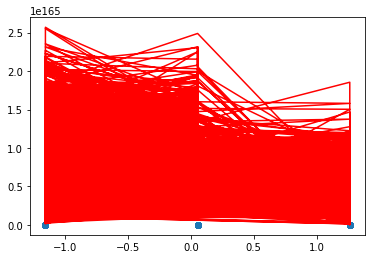

New Theta values are : [array([-7.57925648e+162]), array([2.06241025e+162]), array([-4.14578529e+162]), array([-4.14479201e+162]), array([-3.66319252e+162]), array([-1.69502491e+165]), array([-7.38502285e+164]), array([-3.68607351e+164]), array([-4.80804502e+164])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([3.69555933e+165]), array([-1.0056078e+165]), array([2.0214378e+165]), array([2.02095349e+165]), array([1.78613105e+165]), array([8.26474885e+167]), array([3.60085322e+167]), array([1.79728756e+167]), array([2.34434812e+167])]
New Theta values are : [array([-1.80191274e+168]), array([4.90322937e+167]), array([-9.85630098e+167]), array([-9.85393955e+167]), array([-8.70897202e+167]), array([-4.02979762e+170]), array([-1.75573511e+170]), array([-8.76336989e+169]), array([-1.1430775e+170])]
New Theta values are : [array([8.78592175e+170]), array([-2.39075892e+170]), array([4.80582036e+170]), array([4.80466895e+170]), array([4.24639579e+170]), array([1.96488353e+173]), array([8.5607649e+172]), array([4.27291958e+172]), array([5.573516e+172])]
New Theta values are : [array([-4.2839156e+173]), array([1.16570688e+173]), array([-2.3432634e+173]), array([-2.34270198e+173]), array([-2.07049433e+173]), array([-9.5805488e+175]), array([-4.17413168e+175]), array([-2.083

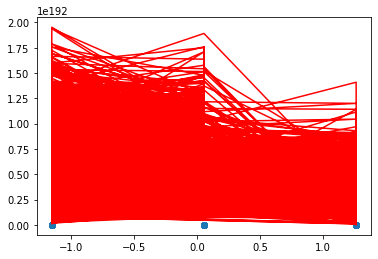

New Theta values are : [array([-5.75655105e+189]), array([1.56642936e+189]), array([-3.14878177e+189]), array([-3.14802736e+189]), array([-2.78224583e+189]), array([-1.28739507e+192]), array([-5.60902789e+191]), array([-2.79962426e+191]), array([-3.65177728e+191])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([2.80682888e+192]), array([-7.63773157e+191]), array([1.53531021e+192]), array([1.53494237e+192]), array([1.35659145e+192]), array([6.27719206e+194]), array([2.73489826e+194]), array([1.36506498e+194]), array([1.7805651e+194])]
New Theta values are : [array([-1.36857786e+195]), array([3.72407112e+194]), array([-7.48599812e+194]), array([-7.48420457e+194]), array([-6.61458576e+194]), array([-3.06068752e+197]), array([-1.33350531e+197]), array([-6.6559017e+196]), array([-8.68183311e+196])]
New Theta values are : [array([6.67303015e+197]), array([-1.81581476e+197]), array([3.65008761e+197]), array([3.6492131e+197]), array([3.22519685e+197]), array([1.49235645e+200]), array([6.50202038e+199]), array([3.24534204e+199]), array([4.23316317e+199])]
New Theta values are : [array([-3.25369367e+200]), array([8.85370643e+199]), array([-1.77974124e+200]), array([-1.77931484e+200]), array([-1.57256933e+200]), array([-7.27656048e+202]), array([-3.17031125e+202]), array([

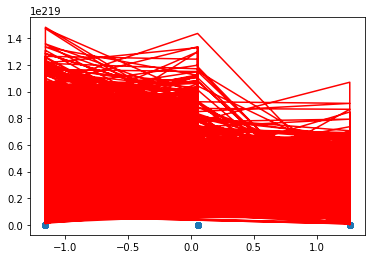

New Theta values are : [array([-4.37218084e+216]), array([1.18972496e+216]), array([-2.39154369e+216]), array([-2.3909707e+216]), array([-2.11315453e+216]), array([-9.77794517e+218]), array([-4.26013494e+218]), array([-2.12635369e+218]), array([-2.77357579e+218])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([2.13182569e+219]), array([-5.80096369e+218]), array([1.16608953e+219]), array([1.16581015e+219]), array([1.03035013e+219]), array([4.76761495e+221]), array([2.07719339e+221]), array([1.03678589e+221]), array([1.35236404e+221])]
New Theta values are : [array([-1.03945398e+222]), array([2.82848398e+221]), array([-5.68572002e+221]), array([-5.68435779e+221]), array([-5.02387017e+221]), array([-2.32463487e+224]), array([-1.01281589e+224]), array([-5.05525021e+223]), array([-6.59397338e+223])]
New Theta values are : [array([5.0682595e+224]), array([-1.37913664e+224]), array([2.77229247e+224]), array([2.77162827e+224]), array([2.44958201e+224]), array([1.13346555e+227]), array([4.9383752e+226]), array([2.46488256e+226]), array([3.21514649e+226])]
New Theta values are : [array([-2.47122574e+227]), array([6.72451356e+226]), array([-1.35173831e+227]), array([-1.35141445e+227]), array([-1.19438835e+227]), array([-5.52664921e+229]), array([-2.40789563e+229]), array(

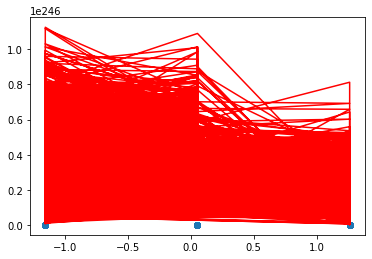

New Theta values are : [array([-3.32073235e+243]), array([9.03612703e+242]), array([-1.8164108e+243]), array([-1.81597561e+243]), array([-1.60497035e+243]), array([-7.42648578e+245]), array([-3.23563193e+245]), array([-1.61499529e+245]), array([-2.10656951e+245])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([1.61915136e+246]), array([-4.40591286e+245]), array([8.85661264e+245]), array([8.85449071e+245]), array([7.82565303e+245]), array([3.62107007e+248]), array([1.57765736e+248]), array([7.87453353e+247]), array([1.02713936e+248])]
New Theta values are : [array([-7.89479803e+248]), array([2.14827304e+248]), array([-4.31838368e+248]), array([-4.31734905e+248]), array([-3.81569949e+248]), array([-1.76559262e+251]), array([-7.69247801e+250]), array([-3.83953307e+250]), array([-5.00821478e+250])]
New Theta values are : [array([3.84941381e+251]), array([-1.04747352e+251]), array([2.10559481e+251]), array([2.10509034e+251]), array([1.86049171e+251]), array([8.60882899e+253]), array([3.75076486e+253]), array([1.87211269e+253]), array([2.44194862e+253])]
New Theta values are : [array([-1.87693043e+254]), array([5.10736187e+253]), array([-1.0266641e+254]), array([-1.02641813e+254]), array([-9.07154617e+253]), array([-4.19756719e+256]), array([-1.82883033e+256]), array

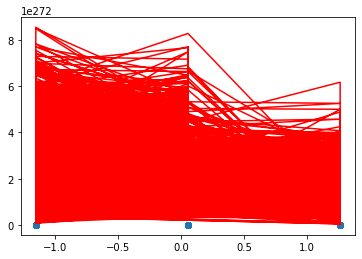

New Theta values are : [array([-2.52214255e+270]), array([6.86306455e+269]), array([-1.37958934e+270]), array([-1.37925881e+270]), array([-1.21899737e+270]), array([-5.64051957e+272]), array([-2.45750759e+272]), array([-1.22661146e+272]), array([-1.59996894e+272])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([1.22976805e+273]), array([-3.34635229e+272]), array([6.72672087e+272]), array([6.72510924e+272]), array([5.94369266e+272]), array([2.75025324e+275]), array([1.19825278e+275]), array([5.98081808e+274]), array([7.80126672e+274])]
New Theta values are : [array([-5.99620925e+275]), array([1.63164335e+275]), array([-3.27987266e+275]), array([-3.27908684e+275]), array([-2.898077e+275]), array([-1.34099223e+278]), array([-5.84254438e+277]), array([-2.91617893e+277]), array([-3.803809e+277])]
New Theta values are : [array([2.92368349e+278]), array([-7.95570756e+277]), array([1.59922864e+278]), array([1.59884548e+278]), array([1.41306941e+278]), array([6.53852573e+280]), array([2.84875825e+280]), array([1.42189571e+280]), array([1.85469405e+280])]
New Theta values are : [array([-1.42555485e+281]), array([3.8791126e+280]), array([-7.79765711e+280]), array([-7.79578889e+280]), array([-6.88996588e+280]), array([-3.18811084e+283]), array([-1.38902215e+283]), array([-6

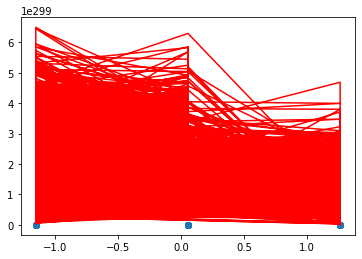

New Theta values are : [array([-1.91560246e+297]), array([5.21259329e+296]), array([-1.04781735e+297]), array([-1.04756631e+297]), array([-9.25845511e+296]), array([-4.28405331e+299]), array([-1.86651131e+299]), array([-9.31628516e+298]), array([-1.21519873e+299])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


New Theta values are : [array([9.3402599e+299]), array([-2.54160125e+299]), array([5.10903835e+299]), array([5.1078143e+299]), array([4.5143175e+299]), array([2.08885571e+302]), array([9.10089702e+301]), array([4.54251478e+301]), array([5.92517092e+301])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in add
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in add
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/di

New Theta values are : [array([-inf]), array([1.23925589e+302]), array([-2.49110904e+302]), array([-2.49051221e+302]), array([-2.20112992e+302]), array([-inf]), array([-inf]), array([-inf]), array([-inf])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract


New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

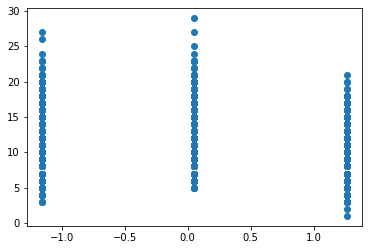

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

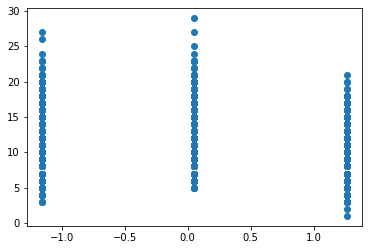

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

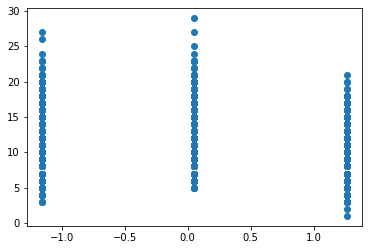

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

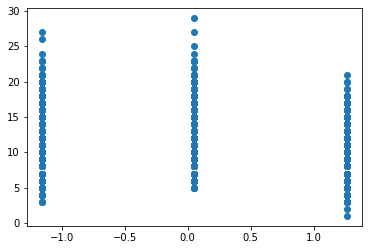

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

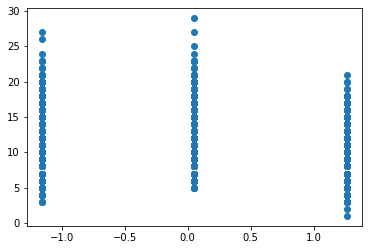

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

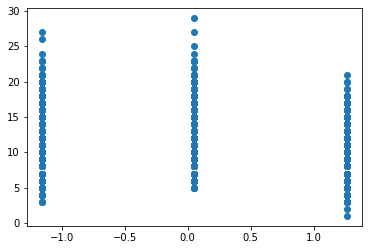

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

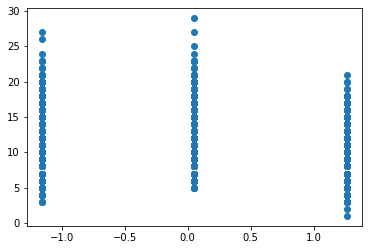

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

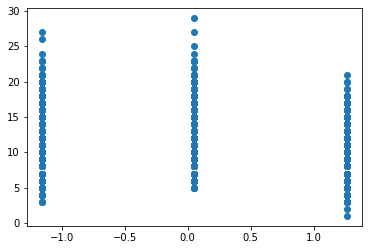

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

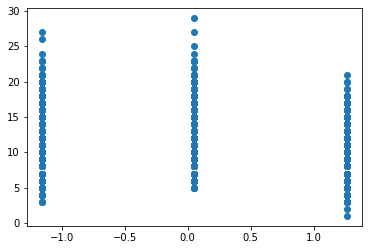

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

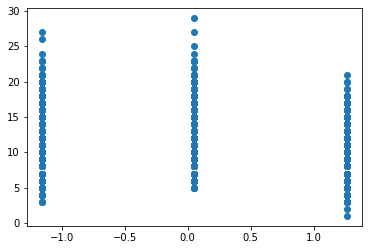

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

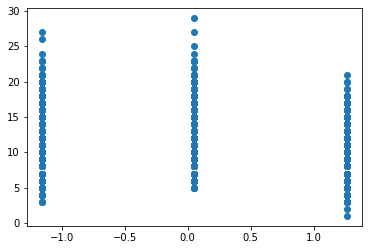

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

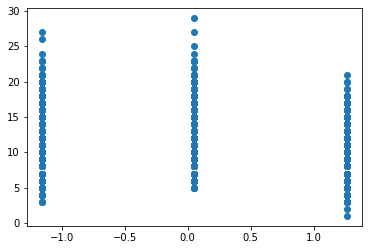

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

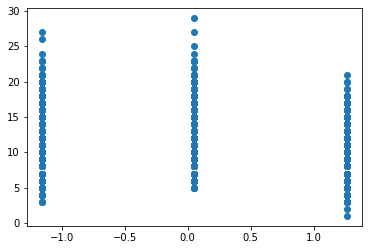

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

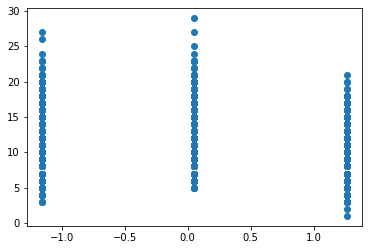

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

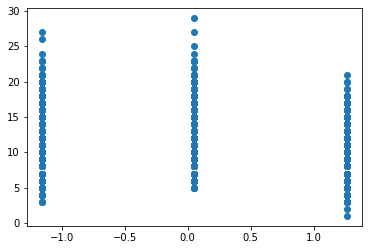

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

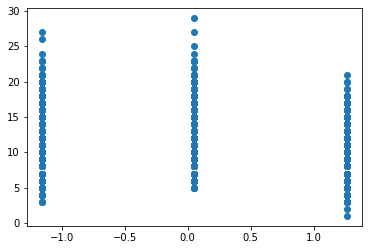

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

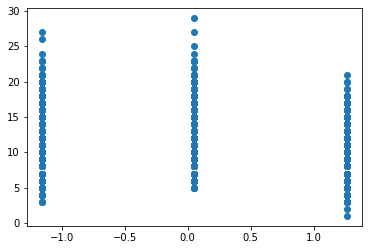

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

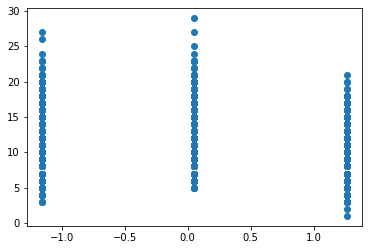

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

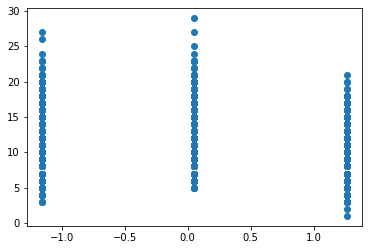

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

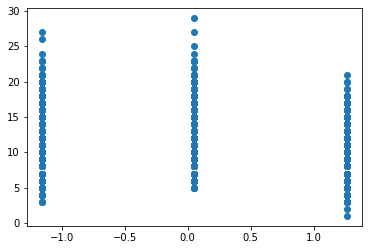

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

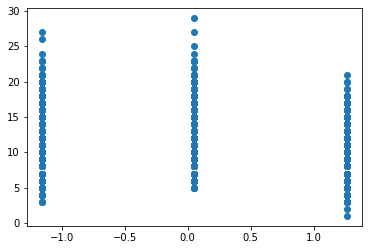

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

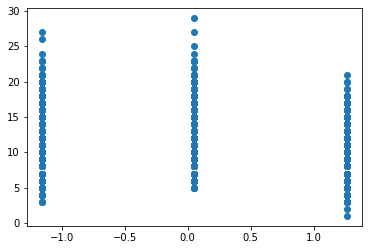

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

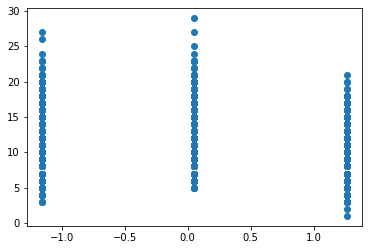

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

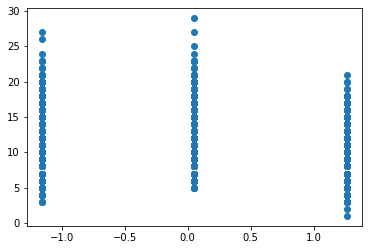

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

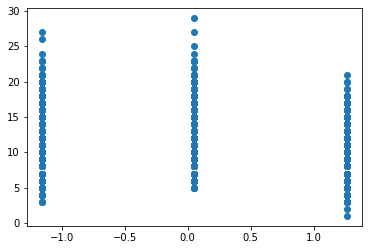

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

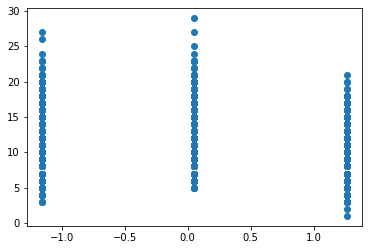

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

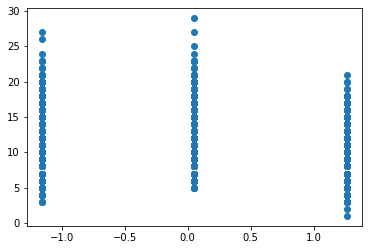

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

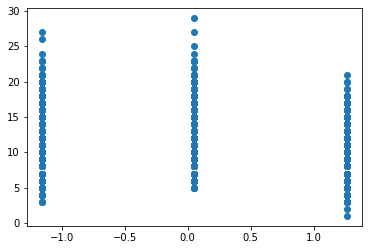

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

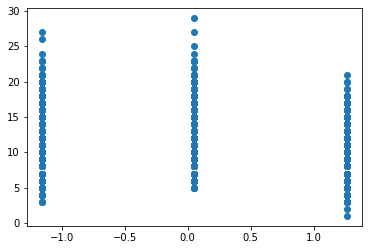

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

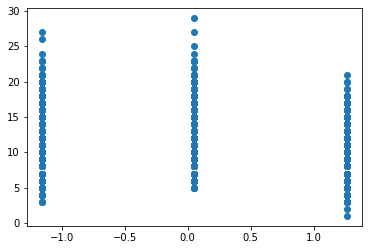

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

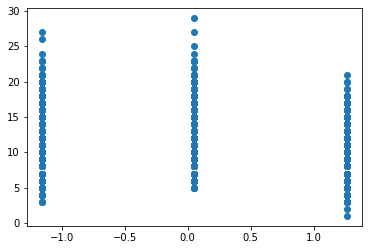

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

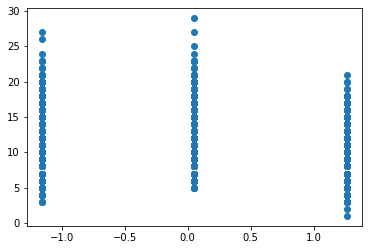

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

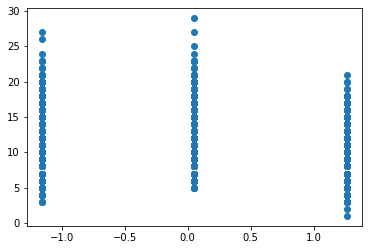

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

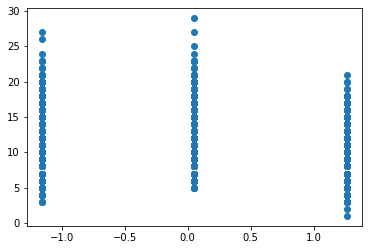

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

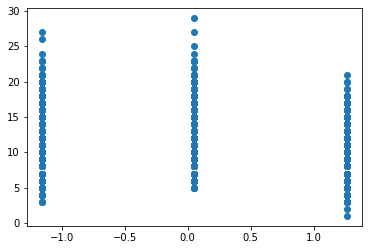

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

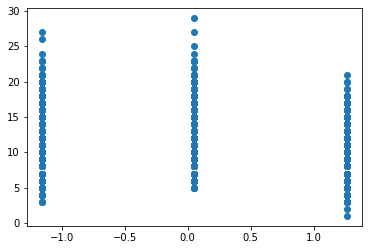

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

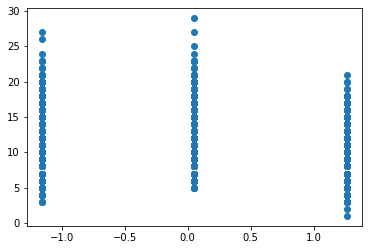

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

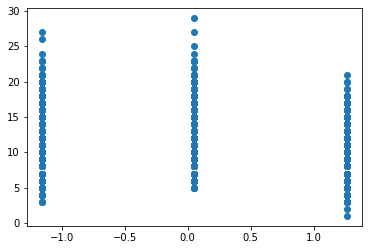

New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
New Theta values are : [array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array(

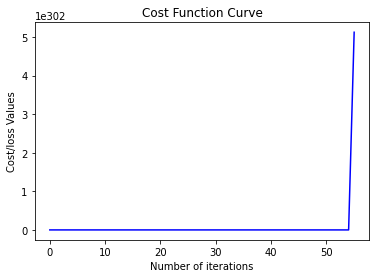

In [ ]:
theta_array=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X[:,4:5],X[:,5:6],X[:,6:7],X[:,7:8],Y,0.01,500)

**Conclusion:** As the data has 9 features we cannot put it in a linear line